In [1]:
import numpy as np 
import xarray as xr 
import MJO_E3SM_util as mjo
import pandas as pd 
import matplotlib.pyplot as plt 
import pickle

In [2]:
%load_ext autoreload
%autoreload 2

# plot development bar chart

In [ ]:
dirn = '/pscratch/sd/l/linyaoly/MJO_E3SM/regridded_data/'
# specify which case we use
case_dir = 'control'
# case_dir = 'FIX_QRT'

In [20]:
def get_comp_4(comp):
    comp5 = {}
    comp5['mse'] = comp['dse'] + comp['qlv']
    comp5['tendency'] = comp['dtdse'] + comp['dtqlv']
    comp5['crmpbl'] = comp['crm_dse'] + comp['crm_qlv'] + comp['pbl_dse'] + comp['pbl_qlv']
    comp5['dyn'] = comp['dyn_dse'] + comp['dyn_qlv']
    comp5['qr'] = comp['qr']

    return comp5

In [21]:
develop_uncertainty = {}
develop_uncertainty['Tendency'] = []
develop_uncertainty['CRMPBL'] = []
develop_uncertainty['Radiation'] = []
develop_uncertainty['Dynamics'] = []

for lat_lim in [5, 10, 15]:
    for kmax in [7, 9, 11]:
        for Tlow in [90, 100, 110]:
            for Thig in [10, 20, 30]:
                flg = str(lat_lim)+'_'+str(kmax)+'_'+str(Tlow)+'_'+str(Thig)
                com_fn = dirn+'analysis/local_MSE_budget/local_MSE_budget_composite_'+case_dir+'_latavg_septq'+flg+'.json'
                comp_tmp = pickle.load(open(com_fn, 'rb'))
                comp = get_comp_4(comp_tmp)

                local_budget_develop = {}
                p = comp['mse']['lev']  # dataarray
                dp = np.zeros(len(p))
                dp[1:] = p[1:].values - p[0:-1].values
                dp[0] = dp[1]  # hPa

                dp = xr.DataArray(dp, dims='lev', coords={'lev': p})

                for key in comp.keys():
                    tmp = (comp['mse'] * comp[key]).mean(dim='lon')
                    local_budget_develop[key] = (tmp * dp / 9.8 * 100).sum(dim='lev').values
           
                norm = local_budget_develop['mse'] * 0.5
                develop_uncertainty['Tendency'].append(local_budget_develop['tendency'] / norm)
                develop_uncertainty['CRMPBL'].append(local_budget_develop['crmpbl'] / norm)
                develop_uncertainty['Radiation'].append(local_budget_develop['qr'] / norm) 
                develop_uncertainty['Dynamics'].append(local_budget_develop['dyn'] / norm)

(-0.5, 0.5)

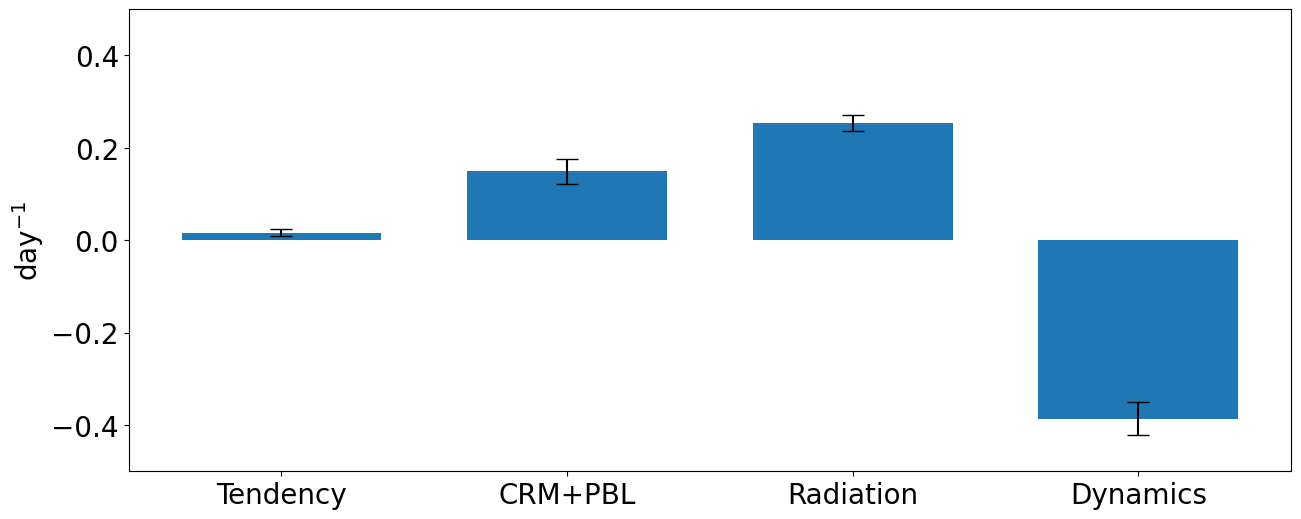

In [23]:
tend = develop_uncertainty['Tendency']
convd = develop_uncertainty['CRMPBL'] 
rad = develop_uncertainty['Radiation']
dynd = develop_uncertainty['Dynamics']

tend_av = np.mean(tend)
convd_av = np.mean(convd)
rad_av = np.mean(rad)
dynd_av = np.mean(dynd)

tend_std = np.std(tend)
convd_std = np.std(convd)
rad_std = np.std(rad)
dynd_std = np.std(dynd)

data = [tend_av, convd_av, rad_av, dynd_av]
data_std = [tend_std, convd_std, rad_std, dynd_std]  

x = ['Tendency', 'CRM+PBL', 'Radiation', 'Dynamics']
x_axis = np.arange(len(x))

fig, ax = plt.subplots(figsize=(15, 6))
plt.rcParams.update({'font.size': 20})
ax.bar(x_axis, data, yerr=data_std, capsize=8, ecolor='black',width=0.7)

ax.set_xticks(x_axis, x)
ax.set_ylabel("day" + r'$^{-1}$')
ax.set_ylim([-0.5,0.5])

(-0.5, 1.5)

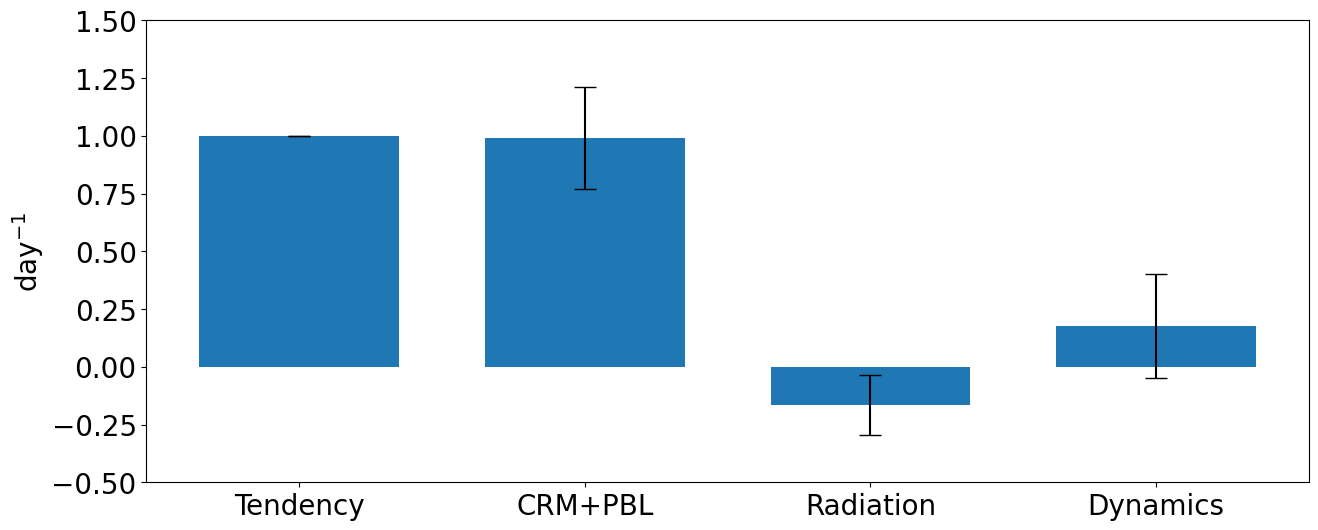

In [33]:
develop_uncertainty = {}
develop_uncertainty['Tendency'] = []
develop_uncertainty['CRMPBL'] = []
develop_uncertainty['Radiation'] = []
develop_uncertainty['Dynamics'] = []

for lat_lim in [5, 10, 15]:
    for kmax in [7, 9, 11]:
        for Tlow in [90, 100, 110]:
            for Thig in [10, 20, 30]:
                flg = str(lat_lim)+'_'+str(kmax)+'_'+str(Tlow)+'_'+str(Thig)
                com_fn = dirn+'analysis/local_MSE_budget/local_MSE_budget_composite_'+case_dir+'_latavg_septq'+flg+'.json'
                comp_tmp = pickle.load(open(com_fn, 'rb'))
                comp = get_comp_4(comp_tmp)

                local_budget_develop = {}
                p = comp['mse']['lev']  # dataarray
                dp = np.zeros(len(p))
                dp[1:] = p[1:].values - p[0:-1].values
                dp[0] = dp[1]  # hPa

                dp = xr.DataArray(dp, dims='lev', coords={'lev': p})

                for key in comp.keys():
                    tmp = (comp['tendency'] * comp[key]).mean(dim='lon')
                    local_budget_develop[key] = (tmp * dp / 9.8 * 100).sum(dim='lev').values
           
                norm = local_budget_develop['tendency'] 
                develop_uncertainty['Tendency'].append(local_budget_develop['tendency'] / norm)
                develop_uncertainty['CRMPBL'].append(local_budget_develop['crmpbl'] / norm)
                develop_uncertainty['Radiation'].append(local_budget_develop['qr'] / norm) 
                develop_uncertainty['Dynamics'].append(local_budget_develop['dyn'] / norm)

tend = develop_uncertainty['Tendency']
convd = develop_uncertainty['CRMPBL'] 
rad = develop_uncertainty['Radiation']
dynd = develop_uncertainty['Dynamics']

tend_av = np.mean(tend)
convd_av = np.mean(convd)
rad_av = np.mean(rad)
dynd_av = np.mean(dynd)

tend_std = np.std(tend)
convd_std = np.std(convd)
rad_std = np.std(rad)
dynd_std = np.std(dynd)

data = [tend_av, convd_av, rad_av, dynd_av]
data_std = [tend_std, convd_std, rad_std, dynd_std]  

x = ['Tendency', 'CRM+PBL', 'Radiation', 'Dynamics']
x_axis = np.arange(len(x))

fig, ax = plt.subplots(figsize=(15, 6))
plt.rcParams.update({'font.size': 20})
ax.bar(x_axis, data, yerr=data_std, capsize=8, ecolor='black',width=0.7)

ax.set_xticks(x_axis, x)
ax.set_ylabel("day" + r'$^{-1}$')
ax.set_ylim([-0.5,1.5])

In [3]:
def get_comp_5(comp):
    comp5 = {}
    comp5['mse'] = comp['dse'] + comp['qlv']
    comp5['tendency'] = comp['dtdse'] + comp['dtqlv']
    comp5['crm'] = comp['crm_dse'] + comp['crm_qlv']
    comp5['pbl'] = comp['pbl_dse'] + comp['pbl_qlv']
    comp5['dyn'] = comp['dyn_dse'] + comp['dyn_qlv']
    comp5['qr'] = comp['qr']

    return comp5

(-0.5, 0.5)

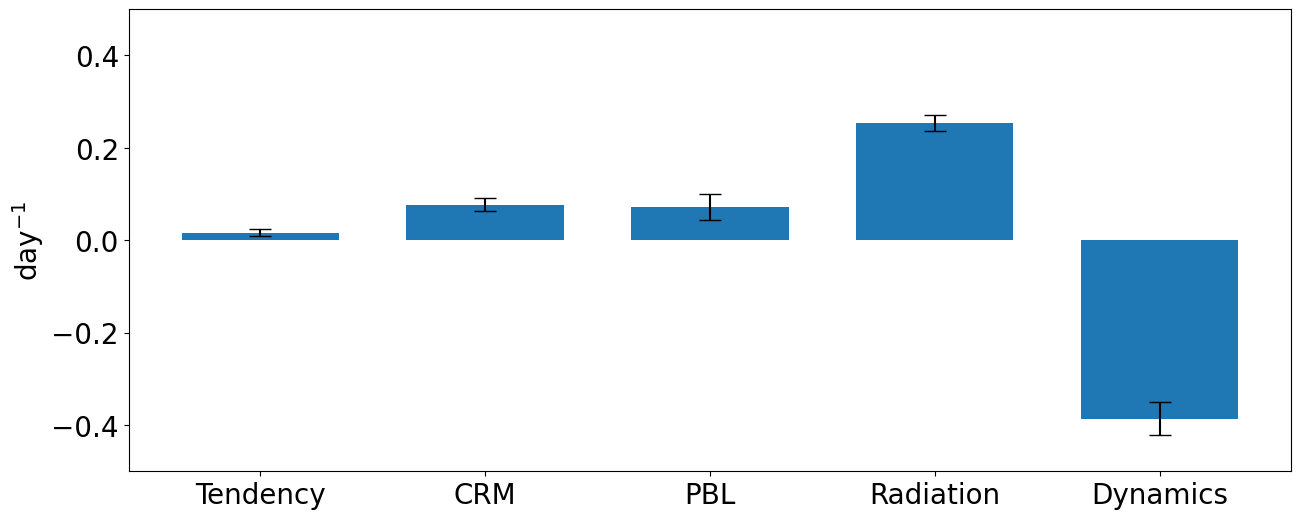

In [34]:
develop_uncertainty = {}
develop_uncertainty['Tendency'] = []
develop_uncertainty['CRM'] = []
develop_uncertainty['PBL'] = []
develop_uncertainty['Radiation'] = []
develop_uncertainty['Dynamics'] = []

for lat_lim in [5, 10, 15]:
    for kmax in [7, 9, 11]:
        for Tlow in [90, 100, 110]:
            for Thig in [10, 20, 30]:
                flg = str(lat_lim)+'_'+str(kmax)+'_'+str(Tlow)+'_'+str(Thig)
                com_fn = dirn+'analysis/local_MSE_budget/local_MSE_budget_composite_'+case_dir+'_latavg_septq'+flg+'.json'
                comp_tmp = pickle.load(open(com_fn, 'rb'))
                comp = get_comp_5(comp_tmp)

                local_budget_develop = {}
                p = comp['mse']['lev']  # dataarray
                dp = np.zeros(len(p))
                dp[1:] = p[1:].values - p[0:-1].values
                dp[0] = dp[1]  # hPa

                dp = xr.DataArray(dp, dims='lev', coords={'lev': p})

                for key in comp.keys():
                    tmp = (comp['mse'] * comp[key]).mean(dim='lon')
                    local_budget_develop[key] = (tmp * dp / 9.8 * 100).sum(dim='lev').values
           
                norm = local_budget_develop['mse'] * 0.5
                develop_uncertainty['Tendency'].append(local_budget_develop['tendency'] / norm)
                develop_uncertainty['CRM'].append(local_budget_develop['crm'] / norm)
                develop_uncertainty['PBL'].append(local_budget_develop['pbl'] / norm)
                develop_uncertainty['Radiation'].append(local_budget_develop['qr'] / norm) 
                develop_uncertainty['Dynamics'].append(local_budget_develop['dyn'] / norm)

tend = develop_uncertainty['Tendency']
convd = develop_uncertainty['CRM'] 
pbld = develop_uncertainty['PBL'] 
rad = develop_uncertainty['Radiation']
dynd = develop_uncertainty['Dynamics']

tend_av = np.mean(tend)
convd_av = np.mean(convd)
pbld_av = np.mean(pbld)
rad_av = np.mean(rad)
dynd_av = np.mean(dynd)

tend_std = np.std(tend)
convd_std = np.std(convd)
pbld_std = np.std(pbld)
rad_std = np.std(rad)
dynd_std = np.std(dynd)

data = [tend_av, convd_av,pbld_av, rad_av, dynd_av]
data_std = [tend_std, convd_std,pbld_std, rad_std, dynd_std]  

x = ['Tendency', 'CRM', 'PBL', 'Radiation', 'Dynamics']
x_axis = np.arange(len(x))

fig, ax = plt.subplots(figsize=(15, 6))
plt.rcParams.update({'font.size': 20})
ax.bar(x_axis, data, yerr=data_std, capsize=8, ecolor='black',width=0.7)

ax.set_xticks(x_axis, x)
ax.set_ylabel("day" + r'$^{-1}$')
ax.set_ylim([-0.5,0.5])

(-0.5, 1.5)

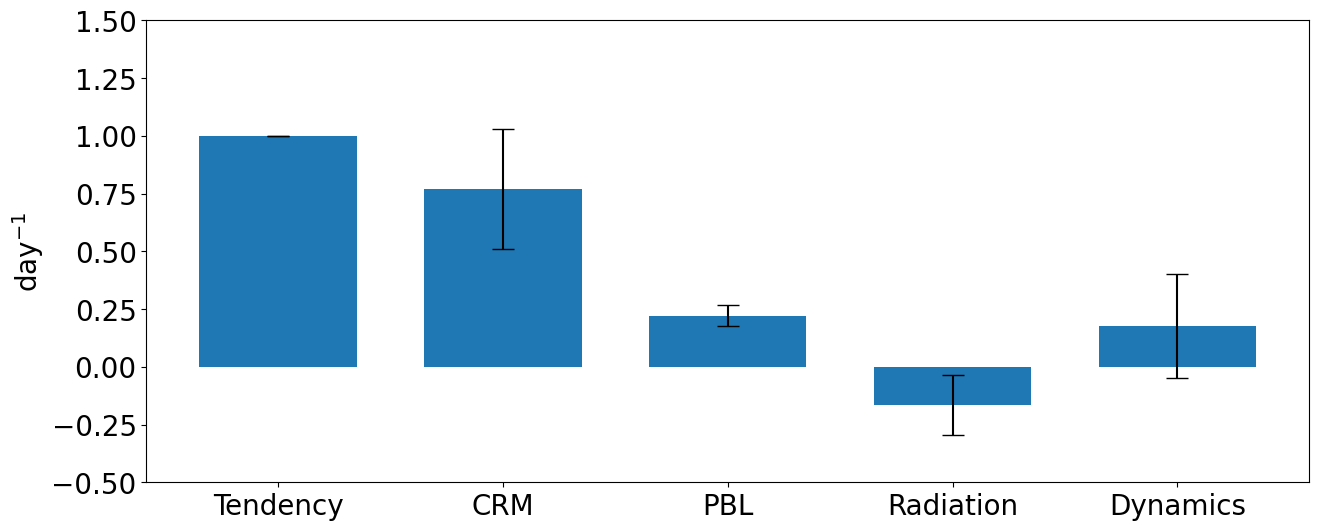

In [35]:
develop_uncertainty = {}
develop_uncertainty['Tendency'] = []
develop_uncertainty['CRM'] = []
develop_uncertainty['PBL'] = []
develop_uncertainty['Radiation'] = []
develop_uncertainty['Dynamics'] = []

for lat_lim in [5, 10, 15]:
    for kmax in [7, 9, 11]:
        for Tlow in [90, 100, 110]:
            for Thig in [10, 20, 30]:
                flg = str(lat_lim)+'_'+str(kmax)+'_'+str(Tlow)+'_'+str(Thig)
                com_fn = dirn+'analysis/local_MSE_budget/local_MSE_budget_composite_'+case_dir+'_latavg_septq'+flg+'.json'
                comp_tmp = pickle.load(open(com_fn, 'rb'))
                comp = get_comp_5(comp_tmp)

                local_budget_develop = {}
                p = comp['mse']['lev']  # dataarray
                dp = np.zeros(len(p))
                dp[1:] = p[1:].values - p[0:-1].values
                dp[0] = dp[1]  # hPa

                dp = xr.DataArray(dp, dims='lev', coords={'lev': p})

                for key in comp.keys():
                    tmp = (comp['tendency'] * comp[key]).mean(dim='lon')
                    local_budget_develop[key] = (tmp * dp / 9.8 * 100).sum(dim='lev').values
           
                norm = local_budget_develop['tendency'] 
                develop_uncertainty['Tendency'].append(local_budget_develop['tendency'] / norm)
                develop_uncertainty['CRM'].append(local_budget_develop['crm'] / norm)
                develop_uncertainty['PBL'].append(local_budget_develop['pbl'] / norm)
                develop_uncertainty['Radiation'].append(local_budget_develop['qr'] / norm) 
                develop_uncertainty['Dynamics'].append(local_budget_develop['dyn'] / norm)

tend = develop_uncertainty['Tendency']
convd = develop_uncertainty['CRM'] 
pbld = develop_uncertainty['PBL'] 
rad = develop_uncertainty['Radiation']
dynd = develop_uncertainty['Dynamics']

tend_av = np.mean(tend)
convd_av = np.mean(convd)
pbld_av = np.mean(pbld)
rad_av = np.mean(rad)
dynd_av = np.mean(dynd)

tend_std = np.std(tend)
convd_std = np.std(convd)
pbld_std = np.std(pbld)
rad_std = np.std(rad)
dynd_std = np.std(dynd)

data = [tend_av, convd_av,pbld_av, rad_av, dynd_av]
data_std = [tend_std, convd_std,pbld_std, rad_std, dynd_std]  

x = ['Tendency', 'CRM', 'PBL', 'Radiation', 'Dynamics']
x_axis = np.arange(len(x))

fig, ax = plt.subplots(figsize=(15, 6))
plt.rcParams.update({'font.size': 20})
ax.bar(x_axis, data, yerr=data_std, capsize=8, ecolor='black',width=0.7)

ax.set_xticks(x_axis, x)
ax.set_ylabel("day" + r'$^{-1}$')
ax.set_ylim([-0.5,1.5])

In [4]:
def get_comp_8(comp):
    comp8 = {}
    comp8['mse'] = comp['dse'] + comp['qlv']
    comp8['tendency'] = comp['dtdse'] + comp['dtqlv']
    comp8['crm_d'] = comp['crm_dse'] 
    comp8['crm_m'] = comp['crm_qlv']
    comp8['pbl_d'] = comp['pbl_dse'] 
    comp8['pbl_m'] = comp['pbl_qlv']
    comp8['dyn_d'] = comp['dyn_dse'] 
    comp8['dyn_m'] = comp['dyn_qlv']
    comp8['qr'] = comp['qr']

    return comp8

(-1.5, 1.5)

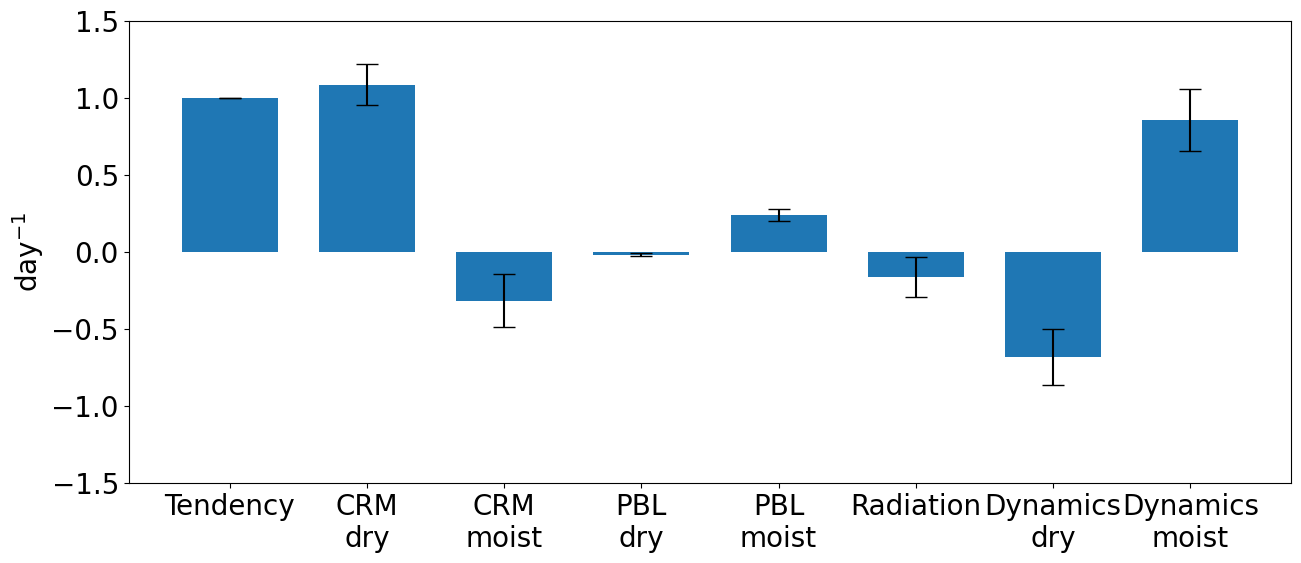

In [38]:
develop_uncertainty = {}
develop_uncertainty['Tendency'] = []
develop_uncertainty['Convection_dry'] = []
develop_uncertainty['Convection_moist'] = []
develop_uncertainty['PBL_dry'] = []
develop_uncertainty['PBL_moist'] = []
develop_uncertainty['Radiation'] = []
develop_uncertainty['Dynamics_dry'] = []
develop_uncertainty['Dynamics_moist'] = []

for lat_lim in [5, 10, 15]:
    for kmax in [7, 9, 11]:
        for Tlow in [90, 100, 110]:
            for Thig in [10, 20, 30]:
                flg = str(lat_lim)+'_'+str(kmax)+'_'+str(Tlow)+'_'+str(Thig)
                com_fn = dirn+'analysis/local_MSE_budget/local_MSE_budget_composite_'+case_dir+'_latavg_septq'+flg+'.json'
                comp_tmp = pickle.load(open(com_fn, 'rb'))
                comp = get_comp_8(comp_tmp)

                local_budget_develop = {}
                p = comp['mse']['lev']  # dataarray
                dp = np.zeros(len(p))
                dp[1:] = p[1:].values - p[0:-1].values
                dp[0] = dp[1]  # hPa

                dp = xr.DataArray(dp, dims='lev', coords={'lev': p})

                for key in comp.keys():
                    tmp = (comp['tendency'] * comp[key]).mean(dim='lon')
                    local_budget_develop[key] = (tmp * dp / 9.8 * 100).sum(dim='lev').values
           
                norm = local_budget_develop['tendency'] 
                develop_uncertainty['Tendency'].append(local_budget_develop['tendency'] / norm)
                develop_uncertainty['Convection_dry'].append(local_budget_develop['crm_d'] / norm)
                develop_uncertainty['Convection_moist'].append(local_budget_develop['crm_m'] / norm)
                develop_uncertainty['PBL_dry'].append(local_budget_develop['pbl_d'] / norm)
                develop_uncertainty['PBL_moist'].append(local_budget_develop['pbl_m'] / norm)
                develop_uncertainty['Radiation'].append(local_budget_develop['qr'] / norm) 
                develop_uncertainty['Dynamics_dry'].append(local_budget_develop['dyn_d'] / norm)
                develop_uncertainty['Dynamics_moist'].append(local_budget_develop['dyn_m'] / norm)

tend = develop_uncertainty['Tendency']
convd = develop_uncertainty['Convection_dry']
pbld = develop_uncertainty['PBL_dry']
convm = develop_uncertainty['Convection_moist']
pblm = develop_uncertainty['PBL_moist']
rad = develop_uncertainty['Radiation']
dynd = develop_uncertainty['Dynamics_dry']
dynm = develop_uncertainty['Dynamics_moist']

tend_av = np.mean(tend)
convd_av = np.mean(convd)
convm_av = np.mean(convm)
pbld_av = np.mean(pbld)
pblm_av = np.mean(pblm)
rad_av = np.mean(rad)
dynd_av = np.mean(dynd)
dynm_av = np.mean(dynm)

tend_std = np.std(tend)
convd_std = np.std(convd)
convm_std = np.std(convm)
pbld_std = np.std(pbld)
pblm_std = np.std(pblm)
rad_std = np.std(rad)
dynd_std = np.std(dynd)
dynm_std = np.std(dynm)

data = [tend_av, convd_av, convm_av,pbld_av, pblm_av,rad_av, dynd_av, dynm_av]
data_std = [tend_std, convd_std, convm_std, pbld_std, pblm_std, rad_std, dynd_std, dynm_std]  

x = ['Tendency', 'CRM'+'\n'+'dry', 'CRM'+'\n'+'moist', 'PBL'+'\n'+'dry', 'PBL'+'\n'+'moist', 'Radiation', 'Dynamics'+'\n'+'dry', 'Dynamics'+'\n'+'moist']
x_axis = np.arange(len(x))

fig, ax = plt.subplots(figsize=(15, 6))
plt.rcParams.update({'font.size': 20})
ax.bar(x_axis, data, yerr=data_std, capsize=8, ecolor='black',width=0.7)

ax.set_xticks(x_axis, x)
ax.set_ylabel("day" + r'$^{-1}$')
ax.set_ylim([-1.5,1.5])

In [16]:
def get_comp_6(comp):
    comp8 = {}
    comp8['mse'] = comp['dse'] + comp['qlv']
    comp8['tendency'] = comp['dtdse'] + comp['dtqlv']
    comp8['crmpbl_d'] = comp['crm_dse'] + comp['pbl_dse'] 
    comp8['crmpbl_m'] = comp['crm_qlv'] + comp['pbl_qlv']
    comp8['dyn_d'] = comp['dyn_dse'] 
    comp8['dyn_m'] = comp['dyn_qlv']
    comp8['qr'] = comp['qr']

    return comp8

(-1.5, 1.5)

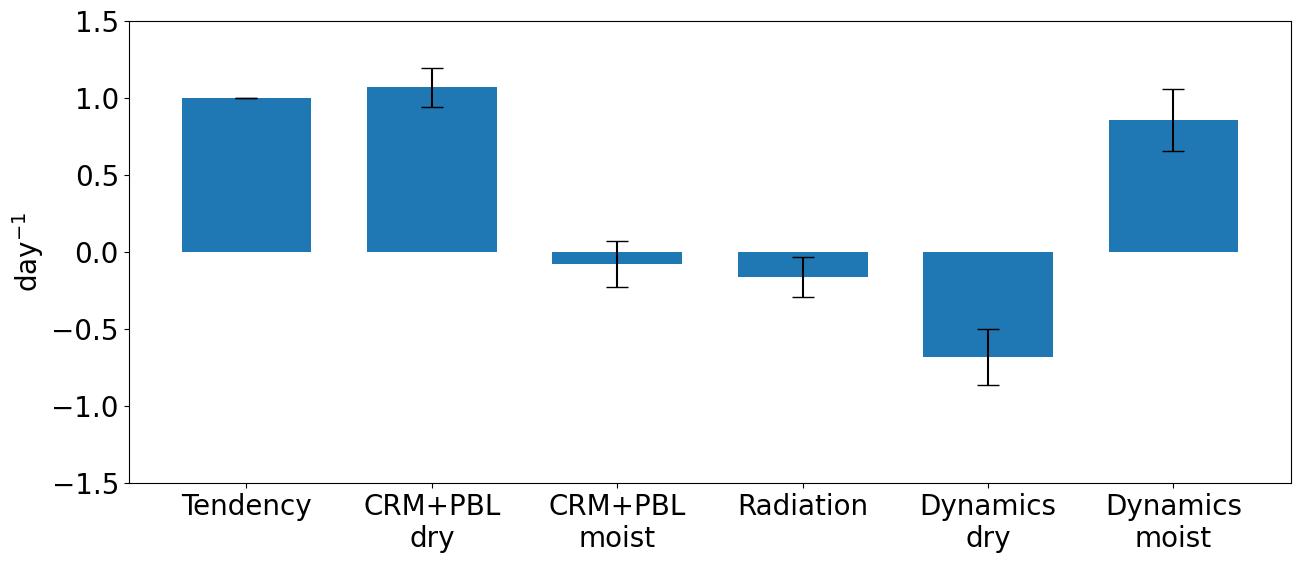

In [37]:
develop_uncertainty = {}
develop_uncertainty['Tendency'] = []
develop_uncertainty['CRMPBL_dry'] = []
develop_uncertainty['CRMPBL_moist'] = []
develop_uncertainty['Radiation'] = []
develop_uncertainty['Dynamics_dry'] = []
develop_uncertainty['Dynamics_moist'] = []

for lat_lim in [5, 10, 15]:
    for kmax in [7, 9, 11]:
        for Tlow in [90, 100, 110]:
            for Thig in [10, 20, 30]:
                flg = str(lat_lim)+'_'+str(kmax)+'_'+str(Tlow)+'_'+str(Thig)
                com_fn = dirn+'analysis/local_MSE_budget/local_MSE_budget_composite_'+case_dir+'_latavg_septq'+flg+'.json'
                comp_tmp = pickle.load(open(com_fn, 'rb'))
                comp = get_comp_6(comp_tmp)

                local_budget_develop = {}
                p = comp['mse']['lev']  # dataarray
                dp = np.zeros(len(p))
                dp[1:] = p[1:].values - p[0:-1].values
                dp[0] = dp[1]  # hPa

                dp = xr.DataArray(dp, dims='lev', coords={'lev': p})

                for key in comp.keys():
                    tmp = (comp['tendency'] * comp[key]).mean(dim='lon')
                    local_budget_develop[key] = (tmp * dp / 9.8 * 100).sum(dim='lev').values
           
                norm = local_budget_develop['tendency'] 
                develop_uncertainty['Tendency'].append(local_budget_develop['tendency'] / norm)
                develop_uncertainty['CRMPBL_dry'].append(local_budget_develop['crmpbl_d'] / norm)
                develop_uncertainty['CRMPBL_moist'].append(local_budget_develop['crmpbl_m'] / norm)
                develop_uncertainty['Radiation'].append(local_budget_develop['qr'] / norm) 
                develop_uncertainty['Dynamics_dry'].append(local_budget_develop['dyn_d'] / norm)
                develop_uncertainty['Dynamics_moist'].append(local_budget_develop['dyn_m'] / norm)

tend = develop_uncertainty['Tendency']
convd = develop_uncertainty['CRMPBL_dry'] 
convm = develop_uncertainty['CRMPBL_moist'] 
rad = develop_uncertainty['Radiation']
dynd = develop_uncertainty['Dynamics_dry']
dynm = develop_uncertainty['Dynamics_moist']

tend_av = np.mean(tend)
convd_av = np.mean(convd)
convm_av = np.mean(convm)
rad_av = np.mean(rad)
dynd_av = np.mean(dynd)
dynm_av = np.mean(dynm)

tend_std = np.std(tend)
convd_std = np.std(convd)
convm_std = np.std(convm)
rad_std = np.std(rad)
dynd_std = np.std(dynd)
dynm_std = np.std(dynm)

data = [tend_av, convd_av, convm_av, rad_av, dynd_av, dynm_av]
data_std = [tend_std, convd_std, convm_std, rad_std, dynd_std, dynm_std]  

x = ['Tendency', 'CRM+PBL'+'\n'+'dry', 'CRM+PBL'+'\n'+'moist', 'Radiation', 'Dynamics'+'\n'+'dry', 'Dynamics'+'\n'+'moist']
x_axis = np.arange(len(x))

fig, ax = plt.subplots(figsize=(15, 6))
plt.rcParams.update({'font.size': 20})
ax.bar(x_axis, data, yerr=data_std, capsize=8, ecolor='black',width=0.7)

ax.set_xticks(x_axis, x)
ax.set_ylabel("day" + r'$^{-1}$')
ax.set_ylim([-1.5,1.5])

In [5]:
dirn = '/pscratch/sd/l/linyaoly/MJO_E3SM/regridded_data/'
# specify which case we use
case_dir = 'control'
# case_dir = 'FIX_QRT'

In [18]:
develop_uncertainty = {}
develop_uncertainty['Tendency'] = []
develop_uncertainty['CRMPBL_dry'] = []
develop_uncertainty['CRMPBL_moist'] = []
develop_uncertainty['Radiation'] = []
develop_uncertainty['Dynamics_dry'] = []
develop_uncertainty['Dynamics_moist'] = []

for lat_lim in [5, 10, 15]:
    for kmax in [7, 9, 11]:
        for Tlow in [90, 100, 110]:
            for Thig in [10, 20, 30]:
                flg = str(lat_lim)+'_'+str(kmax)+'_'+str(Tlow)+'_'+str(Thig)
                com_fn = dirn+'analysis/local_MSE_budget/local_MSE_budget_composite_'+case_dir+'_latavg_septq'+flg+'.json'
                comp_tmp = pickle.load(open(com_fn, 'rb'))
                comp = get_comp_6(comp_tmp)

                local_budget_develop = {}
                p = comp['mse']['lev']  # dataarray
                dp = np.zeros(len(p))
                dp[1:] = p[1:].values - p[0:-1].values
                dp[0] = dp[1]  # hPa

                dp = xr.DataArray(dp, dims='lev', coords={'lev': p})

                for key in comp.keys():
                    tmp = (comp['mse'] * comp[key]).mean(dim='lon')
                    local_budget_develop[key] = (tmp * dp / 9.8 * 100).sum(dim='lev').values
           
                norm = local_budget_develop['mse'] * 0.5
                develop_uncertainty['Tendency'].append(local_budget_develop['tendency'] / norm)
                develop_uncertainty['CRMPBL_dry'].append(local_budget_develop['crmpbl_d'] / norm)
                develop_uncertainty['CRMPBL_moist'].append(local_budget_develop['crmpbl_m'] / norm)
                develop_uncertainty['Radiation'].append(local_budget_develop['qr'] / norm) 
                develop_uncertainty['Dynamics_dry'].append(local_budget_develop['dyn_d'] / norm)
                develop_uncertainty['Dynamics_moist'].append(local_budget_develop['dyn_m'] / norm)

(-1.5, 1.5)

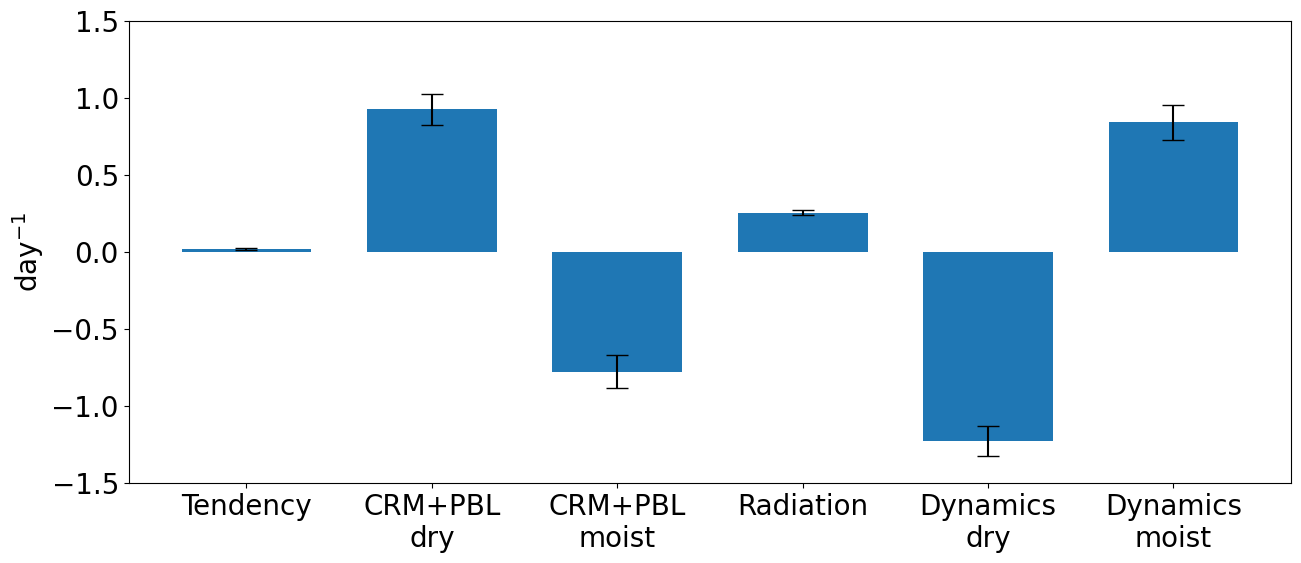

In [19]:
tend = develop_uncertainty['Tendency']
convd = develop_uncertainty['CRMPBL_dry'] 
convm = develop_uncertainty['CRMPBL_moist'] 
rad = develop_uncertainty['Radiation']
dynd = develop_uncertainty['Dynamics_dry']
dynm = develop_uncertainty['Dynamics_moist']

tend_av = np.mean(tend)
convd_av = np.mean(convd)
convm_av = np.mean(convm)
rad_av = np.mean(rad)
dynd_av = np.mean(dynd)
dynm_av = np.mean(dynm)

tend_std = np.std(tend)
convd_std = np.std(convd)
convm_std = np.std(convm)
rad_std = np.std(rad)
dynd_std = np.std(dynd)
dynm_std = np.std(dynm)

data = [tend_av, convd_av, convm_av, rad_av, dynd_av, dynm_av]
data_std = [tend_std, convd_std, convm_std, rad_std, dynd_std, dynm_std]  

x = ['Tendency', 'CRM+PBL'+'\n'+'dry', 'CRM+PBL'+'\n'+'moist', 'Radiation', 'Dynamics'+'\n'+'dry', 'Dynamics'+'\n'+'moist']
x_axis = np.arange(len(x))

fig, ax = plt.subplots(figsize=(15, 6))
plt.rcParams.update({'font.size': 20})
ax.bar(x_axis, data, yerr=data_std, capsize=8, ecolor='black',width=0.7)

ax.set_xticks(x_axis, x)
ax.set_ylabel("day" + r'$^{-1}$')
ax.set_ylim([-1.5,1.5])

In [6]:
develop_uncertainty = {}
develop_uncertainty['Tendency'] = []
develop_uncertainty['Convection_dry'] = []
develop_uncertainty['Convection_moist'] = []
develop_uncertainty['PBL_dry'] = []
develop_uncertainty['PBL_moist'] = []
develop_uncertainty['Radiation'] = []
develop_uncertainty['Dynamics_dry'] = []
develop_uncertainty['Dynamics_moist'] = []

for lat_lim in [5, 10, 15]:
    for kmax in [7, 9, 11]:
        for Tlow in [90, 100, 110]:
            for Thig in [10, 20, 30]:
                flg = str(lat_lim)+'_'+str(kmax)+'_'+str(Tlow)+'_'+str(Thig)
                com_fn = dirn+'analysis/local_MSE_budget/local_MSE_budget_composite_'+case_dir+'_latavg_septq'+flg+'.json'
                comp_tmp = pickle.load(open(com_fn, 'rb'))
                comp = get_comp_8(comp_tmp)

                local_budget_develop = {}
                p = comp['mse']['lev']  # dataarray
                dp = np.zeros(len(p))
                dp[1:] = p[1:].values - p[0:-1].values
                dp[0] = dp[1]  # hPa

                dp = xr.DataArray(dp, dims='lev', coords={'lev': p})

                for key in comp.keys():
                    tmp = (comp['mse'] * comp[key]).mean(dim='lon')
                    local_budget_develop[key] = (tmp * dp / 9.8 * 100).sum(dim='lev').values
           
                norm = local_budget_develop['mse'] * 0.5
                develop_uncertainty['Tendency'].append(local_budget_develop['tendency'] / norm)
                develop_uncertainty['Convection_dry'].append(local_budget_develop['crm_d'] / norm)
                develop_uncertainty['Convection_moist'].append(local_budget_develop['crm_m'] / norm)
                develop_uncertainty['PBL_dry'].append(local_budget_develop['pbl_d'] / norm)
                develop_uncertainty['PBL_moist'].append(local_budget_develop['pbl_m'] / norm)
                develop_uncertainty['Radiation'].append(local_budget_develop['qr'] / norm) 
                develop_uncertainty['Dynamics_dry'].append(local_budget_develop['dyn_d'] / norm)
                develop_uncertainty['Dynamics_moist'].append(local_budget_develop['dyn_m'] / norm)

(-1.5, 1.5)

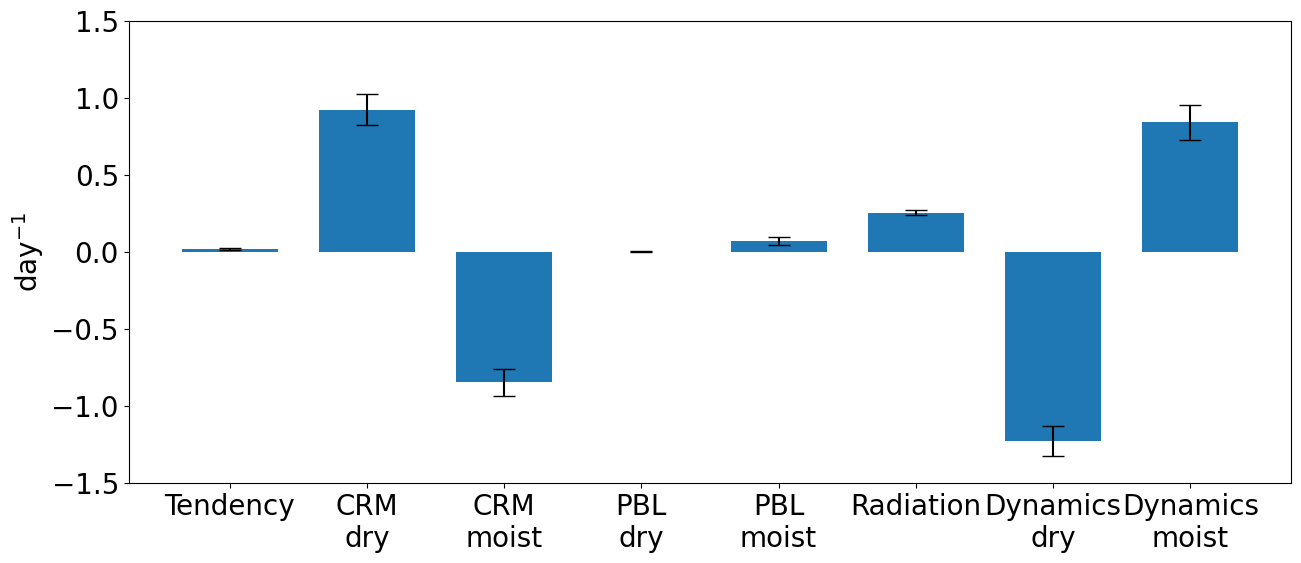

In [12]:
develop_uncertainty = {}
develop_uncertainty['Tendency'] = []
develop_uncertainty['Convection_dry'] = []
develop_uncertainty['Convection_moist'] = []
develop_uncertainty['PBL_dry'] = []
develop_uncertainty['PBL_moist'] = []
develop_uncertainty['Radiation'] = []
develop_uncertainty['Dynamics_dry'] = []
develop_uncertainty['Dynamics_moist'] = []

for lat_lim in [5, 10, 15]:
    for kmax in [7, 9, 11]:
        for Tlow in [90, 100, 110]:
            for Thig in [10, 20, 30]:
                flg = str(lat_lim)+'_'+str(kmax)+'_'+str(Tlow)+'_'+str(Thig)
                com_fn = dirn+'analysis/local_MSE_budget/local_MSE_budget_composite_'+case_dir+'_latavg_septq'+flg+'.json'
                comp_tmp = pickle.load(open(com_fn, 'rb'))
                comp = get_comp_8(comp_tmp)

                local_budget_develop = {}
                p = comp['mse']['lev']  # dataarray
                dp = np.zeros(len(p))
                dp[1:] = p[1:].values - p[0:-1].values
                dp[0] = dp[1]  # hPa

                dp = xr.DataArray(dp, dims='lev', coords={'lev': p})

                for key in comp.keys():
                    tmp = (comp['mse'] * comp[key]).mean(dim='lon')
                    local_budget_develop[key] = (tmp * dp / 9.8 * 100).sum(dim='lev').values
           
                norm = local_budget_develop['mse'] * 0.5
                develop_uncertainty['Tendency'].append(local_budget_develop['tendency'] / norm)
                develop_uncertainty['Convection_dry'].append(local_budget_develop['crm_d'] / norm)
                develop_uncertainty['Convection_moist'].append(local_budget_develop['crm_m'] / norm)
                develop_uncertainty['PBL_dry'].append(local_budget_develop['pbl_d'] / norm)
                develop_uncertainty['PBL_moist'].append(local_budget_develop['pbl_m'] / norm)
                develop_uncertainty['Radiation'].append(local_budget_develop['qr'] / norm) 
                develop_uncertainty['Dynamics_dry'].append(local_budget_develop['dyn_d'] / norm)
                develop_uncertainty['Dynamics_moist'].append(local_budget_develop['dyn_m'] / norm)

tend = develop_uncertainty['Tendency']
convd = develop_uncertainty['Convection_dry']
pbld = develop_uncertainty['PBL_dry']
convm = develop_uncertainty['Convection_moist']
pblm = develop_uncertainty['PBL_moist']
rad = develop_uncertainty['Radiation']
dynd = develop_uncertainty['Dynamics_dry']
dynm = develop_uncertainty['Dynamics_moist']

tend_av = np.mean(tend)
convd_av = np.mean(convd)
convm_av = np.mean(convm)
pbld_av = np.mean(pbld)
pblm_av = np.mean(pblm)
rad_av = np.mean(rad)
dynd_av = np.mean(dynd)
dynm_av = np.mean(dynm)

tend_std = np.std(tend)
convd_std = np.std(convd)
convm_std = np.std(convm)
pbld_std = np.std(pbld)
pblm_std = np.std(pblm)
rad_std = np.std(rad)
dynd_std = np.std(dynd)
dynm_std = np.std(dynm)

data = [tend_av, convd_av, convm_av,pbld_av, pblm_av,rad_av, dynd_av, dynm_av]
data_std = [tend_std, convd_std, convm_std, pbld_std, pblm_std, rad_std, dynd_std, dynm_std]  

x = ['Tendency', 'CRM'+'\n'+'dry', 'CRM'+'\n'+'moist', 'PBL'+'\n'+'dry', 'PBL'+'\n'+'moist', 'Radiation', 'Dynamics'+'\n'+'dry', 'Dynamics'+'\n'+'moist']
x_axis = np.arange(len(x))

fig, ax = plt.subplots(figsize=(15, 6))
plt.rcParams.update({'font.size': 20})
ax.bar(x_axis, data, yerr=data_std, capsize=8, ecolor='black',width=0.7)

ax.set_xticks(x_axis, x)
ax.set_ylabel("day" + r'$^{-1}$')
ax.set_ylim([-1.5,1.5])

In [33]:
develop_uncertainty = {}
develop_uncertainty['Tendency'] = []
develop_uncertainty['Convection'] = []
develop_uncertainty['PBL'] = []
develop_uncertainty['Radiation'] = []
develop_uncertainty['Dynamics'] = []

for lat_lim in [5,10]: # [5, 10, 15]:
    for kmax in [7]: # [7, 9, 11]:
        for Tlow in [90, 100]: # [90, 100, 110]:
            for Thig in [10, 20, 30]:
                flg = str(lat_lim)+'_'+str(kmax)+'_'+str(Tlow)+'_'+str(Thig)
                com_fn = dirn+'analysis/local_MSE_budget/local_MSE_budget_composite_'+case_dir+'_latavg_septq'+flg+'.json'
                comp_tmp = pickle.load(open(com_fn, 'rb'))
                comp = get_comp_5(comp_tmp)

                local_budget_develop = {}
                p = comp['mse']['lev']  # dataarray
                dp = np.zeros(len(p))
                dp[1:] = p[1:].values - p[0:-1].values
                dp[0] = dp[1]  # hPa

                dp = xr.DataArray(dp, dims='lev', coords={'lev': p})

                for key in comp.keys():
                    tmp = (comp['mse'] * comp[key]).mean(dim='lon')
                    local_budget_develop[key] = (tmp * dp / 9.8 * 100).sum(dim='lev').values

                # Creating the bar plot
                # data = {}
                # norm = local_budget_develop['mse'] * 0.5
                # data['Tendency'] = local_budget_develop['tendency'] / norm
                # data['Convection'] = local_budget_develop['crm'] / norm
                # data['PBL'] =  local_budget_develop['pbl'] / norm
                # data['Radiation'] = local_budget_develop['qr'] / norm 
                # data['Dynamics'] = local_budget_develop['dyn'] / norm
           
                norm = local_budget_develop['mse'] * 0.5
                develop_uncertainty['Tendency'].append(local_budget_develop['tendency'] / norm)
                develop_uncertainty['Convection'].append(local_budget_develop['crm'] / norm)
                develop_uncertainty['PBL'].append(local_budget_develop['pbl'] / norm)
                develop_uncertainty['Radiation'].append(local_budget_develop['qr'] / norm) 
                develop_uncertainty['Dynamics'].append(local_budget_develop['dyn'] / norm)
                


(-0.5, 0.3)

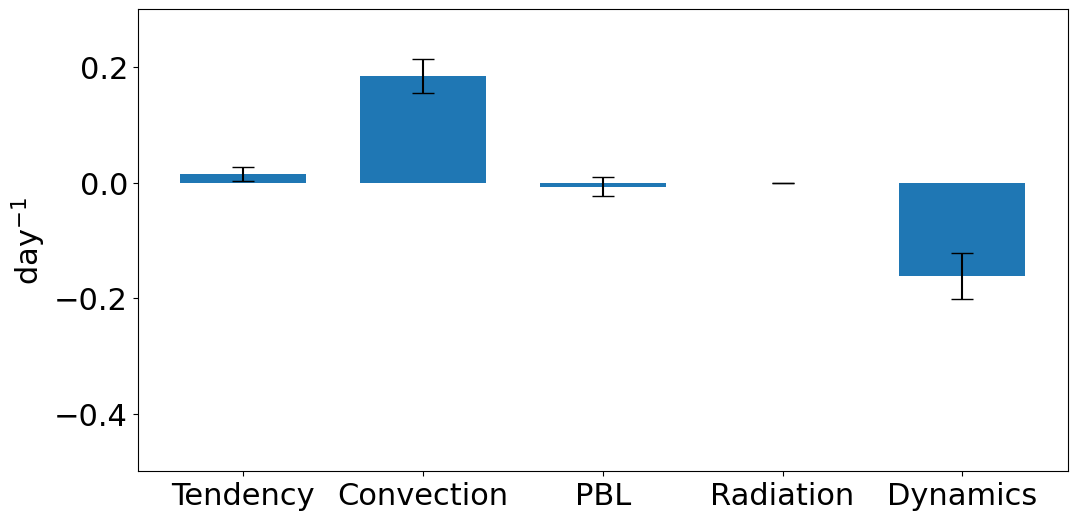

In [34]:
tend = develop_uncertainty['Tendency']
conv = develop_uncertainty['Convection']
pbl = develop_uncertainty['PBL']
rad = develop_uncertainty['Radiation']
dyn = develop_uncertainty['Dynamics']

tend_av = np.mean(tend)
conv_av = np.mean(conv)
pbl_av = np.mean(pbl)
rad_av = np.mean(rad)
dyn_av = np.mean(dyn)

tend_std = np.std(tend)
conv_std = np.std(conv)
pbl_std = np.std(pbl)
rad_std = np.std(rad)
dyn_std = np.std(dyn)

data = [tend_av, conv_av, pbl_av, rad_av, dyn_av]
data_std = [tend_std, conv_std, pbl_std, rad_std, dyn_std]  

x = ['Tendency', 'Convection', 'PBL', 'Radiation', 'Dynamics']
x_axis = np.arange(len(x))

fig, ax = plt.subplots(figsize=(12, 6))
plt.rcParams.update({'font.size': 22})
ax.bar(x_axis, data, yerr=data_std, capsize=8, ecolor='black',width=0.7)

ax.set_xticks(x_axis, x)
ax.set_ylabel("day" + r'$^{-1}$')
ax.set_ylim([-0.5,0.3])

In [35]:
# lat_lim = 10  # 5, 10, 15
# kmax = 9  # 7, 9, 11
# Tlow = 100  # 90, 100, 110
# Thig = 20  # 10, 20, 30    

# flg = str(lat_lim)+'_'+str(kmax)+'_'+str(Tlow)+'_'+str(Thig)

# # mse_fn = dirn+'analysis/local_MSE_budget/local_MSE_budget_'+case_dir+'_latavg_septq'+flg+'.json'
# com_fn = dirn+'analysis/local_MSE_budget/local_MSE_budget_composite_'+case_dir+'_latavg_septq'+flg+'.json'
# comp = pickle.load(open(com_fn, 'rb'))

prog_uncertainty = {}
prog_uncertainty['Tendency'] = []
prog_uncertainty['Convection'] = []
prog_uncertainty['PBL'] = []
prog_uncertainty['Radiation'] = []
prog_uncertainty['Dynamics'] = []

for lat_lim in [5,10]: # [5, 10, 15]:
    for kmax in [7]: # [7, 9, 11]:
        for Tlow in [90, 100]: # [90, 100, 110]:
            for Thig in [10, 20, 30]:
                flg = str(lat_lim)+'_'+str(kmax)+'_'+str(Tlow)+'_'+str(Thig)
                com_fn = dirn+'analysis/local_MSE_budget/local_MSE_budget_composite_'+case_dir+'_latavg_septq'+flg+'.json'
                comp_tmp = pickle.load(open(com_fn, 'rb'))
                comp = get_comp_5(comp_tmp)

                local_budget_prog = {}
                p = comp['mse']['lev']  # dataarray
                dp = np.zeros(len(p))
                dp[1:] = p[1:].values - p[0:-1].values
                dp[0] = dp[1]  # hPa

                dp = xr.DataArray(dp, dims='lev', coords={'lev': p})

                for key in comp.keys():
                    tmp = (comp['tendency'] * comp[key]).mean(dim='lon')
                    local_budget_prog[key] = (tmp * dp / 9.8 * 100).sum(dim='lev').values

                norm = local_budget_prog['tendency'] 
                prog_uncertainty['Tendency'].append(local_budget_prog['tendency'] / norm)
                prog_uncertainty['Convection'].append(local_budget_prog['crm'] / norm)
                prog_uncertainty['PBL'].append(local_budget_prog['pbl'] / norm)
                prog_uncertainty['Radiation'].append(local_budget_prog['qr'] / norm) 
                prog_uncertainty['Dynamics'].append(local_budget_prog['dyn'] / norm)
                


(-0.5, 1.1)

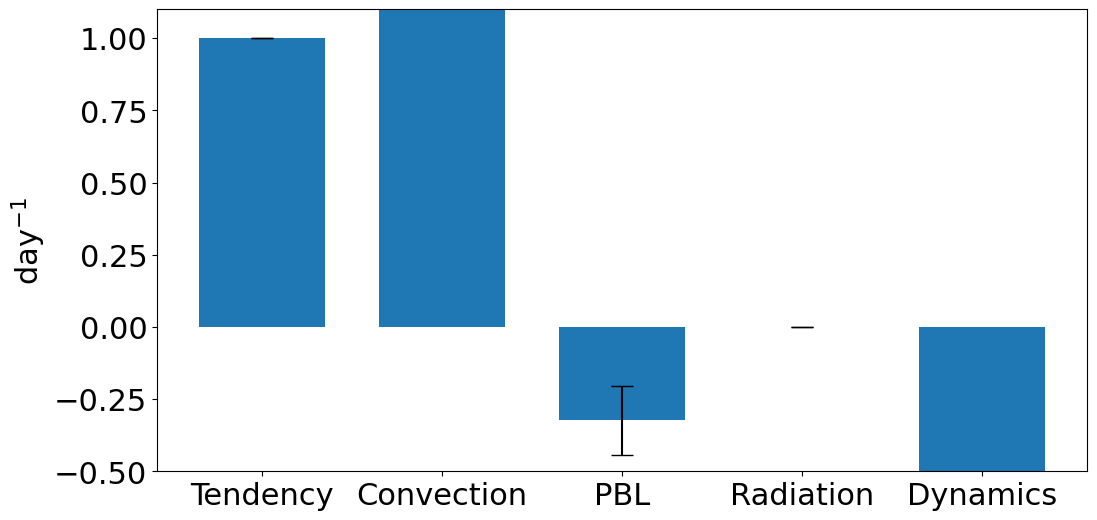

In [36]:
tend = prog_uncertainty['Tendency']
conv = prog_uncertainty['Convection']
pbl = prog_uncertainty['PBL']
rad = prog_uncertainty['Radiation']
dyn = prog_uncertainty['Dynamics']

tend_av = np.mean(tend)
conv_av = np.mean(conv)
pbl_av = np.mean(pbl)
rad_av = np.mean(rad)
dyn_av = np.mean(dyn)

tend_std = np.std(tend)
conv_std = np.std(conv)
pbl_std = np.std(pbl)
rad_std = np.std(rad)
dyn_std = np.std(dyn)

data = [tend_av, conv_av, pbl_av, rad_av, dyn_av]
data_std = [tend_std, conv_std, pbl_std, rad_std, dyn_std]  

x = ['Tendency', 'Convection', 'PBL', 'Radiation', 'Dynamics']
x_axis = np.arange(len(x))

fig, ax = plt.subplots(figsize=(12, 6))
plt.rcParams.update({'font.size': 22})
ax.bar(x_axis, data, yerr=data_std, capsize=8, ecolor='black',width=0.7)

ax.set_xticks(x_axis, x)
ax.set_ylabel("day" + r'$^{-1}$')
ax.set_ylim([-0.5,1.1])

# plot vertical composites

In [3]:
dirn = '/pscratch/sd/l/linyaoly/MJO_E3SM/regridded_data/'
# specify which case we use
case_dir = 'control'
lat_lim = 10  # 5, 10, 15
kmax = 9  # 7, 9, 11
Tlow = 100  # 90, 100, 110
Thig = 20  # 10, 20, 30    

flg = str(lat_lim)+'_'+str(kmax)+'_'+str(Tlow)+'_'+str(Thig)

# mse_fn = dirn+'analysis/local_MSE_budget/local_MSE_budget_'+case_dir+'_latavg_septq'+flg+'.json'
com_fn = dirn+'analysis/local_MSE_budget/local_MSE_budget_composite_'+case_dir+'_latavg_septq'+flg+'.json'
comp = pickle.load(open(com_fn, 'rb'))


In [4]:
comp.keys() 

dict_keys(['dse', 'qlv', 'dtdse', 'dtqlv', 'crm_dse', 'crm_qlv', 'pbl_dse', 'pbl_qlv', 'qr', 'dyn_dse', 'dyn_qlv'])

In [44]:
def plot_comp(data, vmin=None, vmax=None, cbflg=False):
    plt.rcParams.update({'font.size': 22})
    fig, ax = plt.subplots(1,1, figsize=(7,6))
    if vmin is None:
        vmin = np.min(-np.abs(data))
        vmax = np.max(np.abs(data))
        vmin = np.min([vmin, -vmax])
        vmax = np.max([vmax, -vmin])
        
    # ax.set_title(key, pad=20)
    if cbflg:
        v = np.linspace(vmin, vmax, 11)
        levels = np.linspace(vmin, vmax, 25)    
        im = ax.contourf(data.lon, data.lev, data, cmap='RdBu_r', levels=levels, vmin=vmin, vmax=vmax)
    
        cb = plt.colorbar(im, ticks=v, ax=ax)
        cb.ax.set_label('Values')
    else:
        im = ax.contourf(data.lon, data.lev, data, cmap='RdBu_r', levels=25, vmin=vmin, vmax=vmax)
    
    ax.set_xlabel('longitude')
    ax.set_ylabel('pressure (hPa)')
    ax.invert_yaxis()    
    plt.show()

In [20]:
def plot_cb(data, vmin=None, vmax=None):
    plt.rcParams.update({'font.size': 22})
    fig, ax = plt.subplots(1,1, figsize=(7,6))
    if vmin is None:
        vmin = np.min(-np.abs(data))
        vmax = np.max(np.abs(data))
        vmin = np.min([vmin, -vmax])
        vmax = np.max([vmax, -vmin])
        
    v = np.linspace(vmin, vmax, 11)
    levels = np.linspace(vmin, vmax, 25)
    im = ax.contourf(data.lon, data.lev, data, cmap='RdBu_r', levels=levels, vmin=vmin, vmax=vmax)
    ax.set_xlabel('longitude')
    ax.set_ylabel('pressure (hPa)')
    ax.invert_yaxis()
    # ax.set_title(key, pad=20)
    cb = plt.colorbar(im, ticks=v)
    cb.ax.set_label('Values')
    plt.show()

In [25]:
comp.keys()

dict_keys(['dse', 'qlv', 'dtdse', 'dtqlv', 'crm_dse', 'crm_qlv', 'pbl_dse', 'pbl_qlv', 'qr', 'dyn_dse', 'dyn_qlv'])

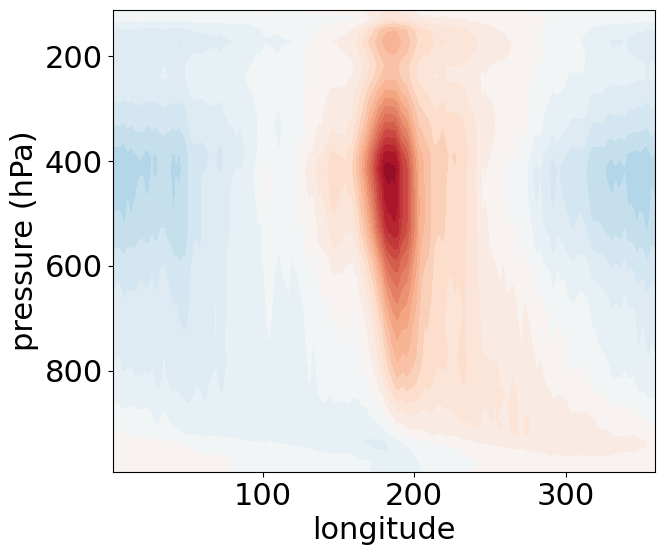

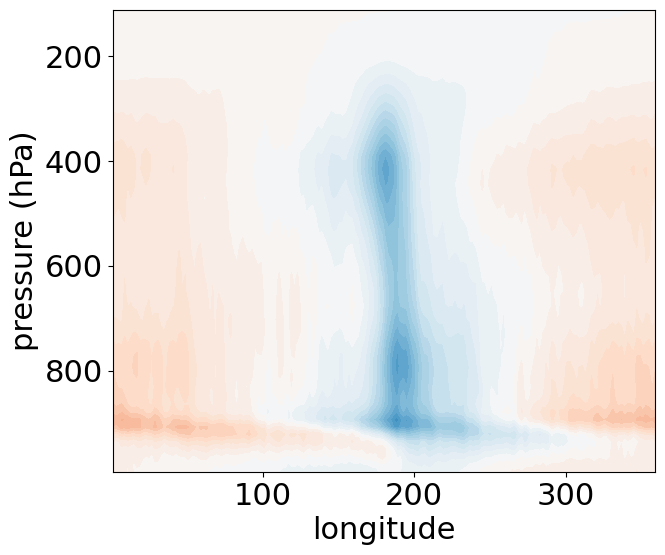

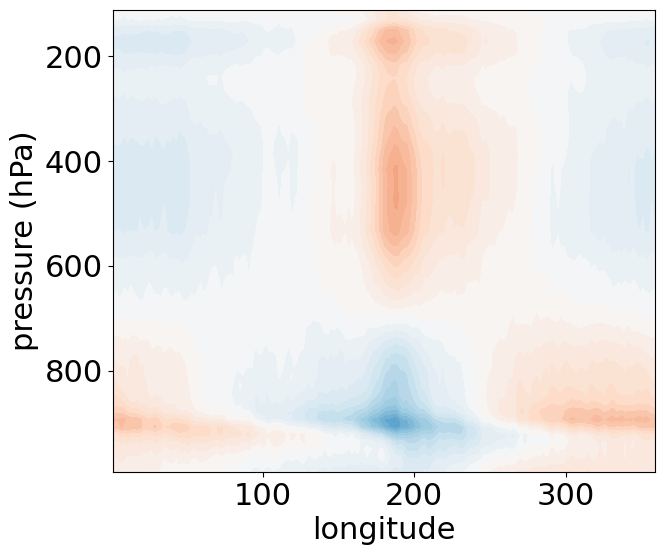

In [61]:
vmin = -1900
vmax = 1900
# vmin = None
# vmax = None
# cbflg = True
cbflg = False

data = comp['crm_dse']+comp['pbl_dse'] # comp['crm_dse']+comp['pbl_dse']+comp['dyn_dse']
plot_comp(data, vmin=vmin, vmax=vmax, cbflg=cbflg)
data1 = comp['crm_qlv']+comp['pbl_qlv'] # comp['crm_qlv']+comp['pbl_qlv']+comp['dyn_qlv']
plot_comp(data1, vmin=vmin, vmax=vmax, cbflg=cbflg)
plot_comp(data+data1, vmin=vmin, vmax=vmax, cbflg=cbflg)


['dse', 'qlv', 'dtdse', 'dtqlv', 'crm_dse', 'crm_qlv', 'pbl_dse', 'pbl_qlv', 'qr', 'dyn_dse', 'dyn_qlv']


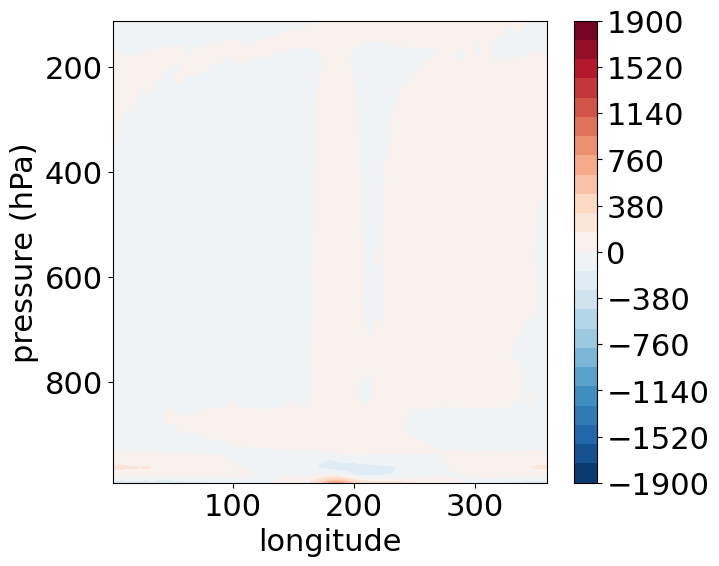

In [55]:
key = list(comp.keys())
vmin = -1900
vmax = 1900
print(key)
plot_cb(comp[key[6]], vmin=vmin, vmax=vmax)


no_qr


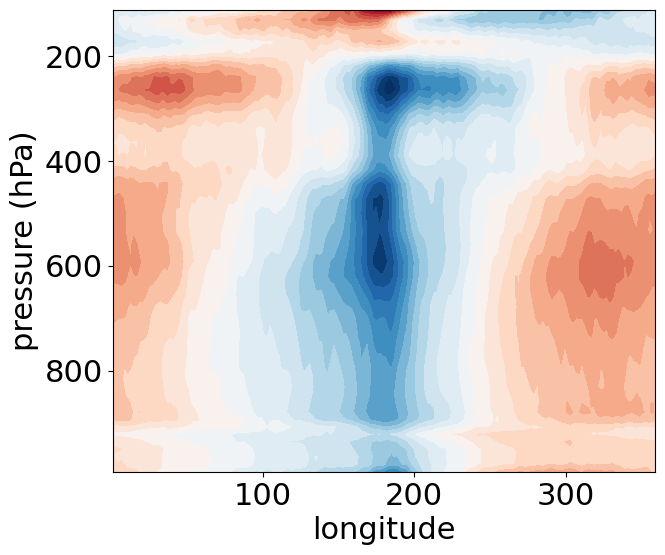

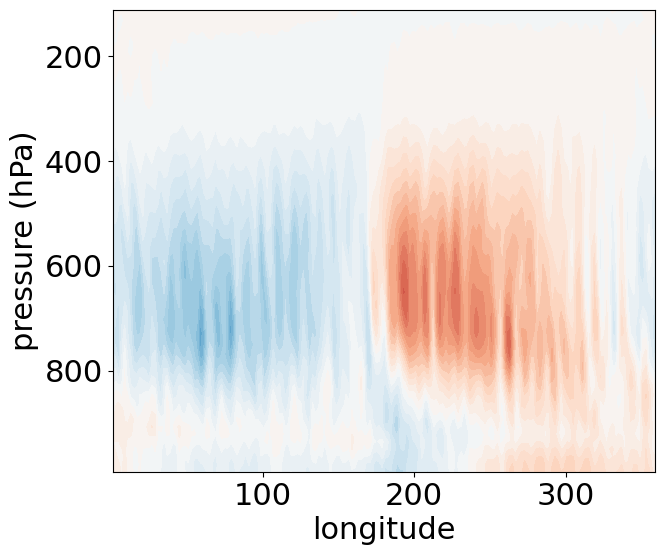

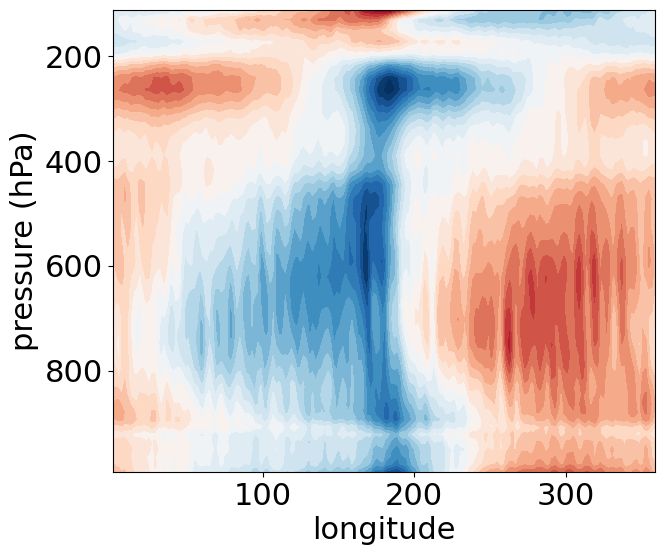

In [52]:
vmin = -300
vmax = 300
# vmin = None
# vmax = None
cbflg = False
print('no_qr')
data = comp['crm_dse']+comp['pbl_dse']+comp['dyn_dse']
plot_comp(data, vmin=vmin, vmax=vmax, cbflg=cbflg)
data1 = comp['crm_qlv']+comp['pbl_qlv']+comp['dyn_qlv']
plot_comp(data1, vmin=vmin, vmax=vmax, cbflg=cbflg)
plot_comp(data+data1, vmin=vmin, vmax=vmax, cbflg=cbflg)


dtdse


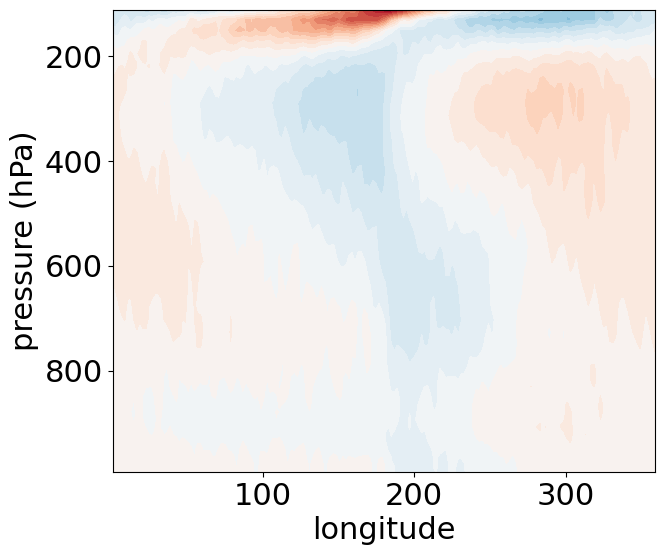

dtqlv


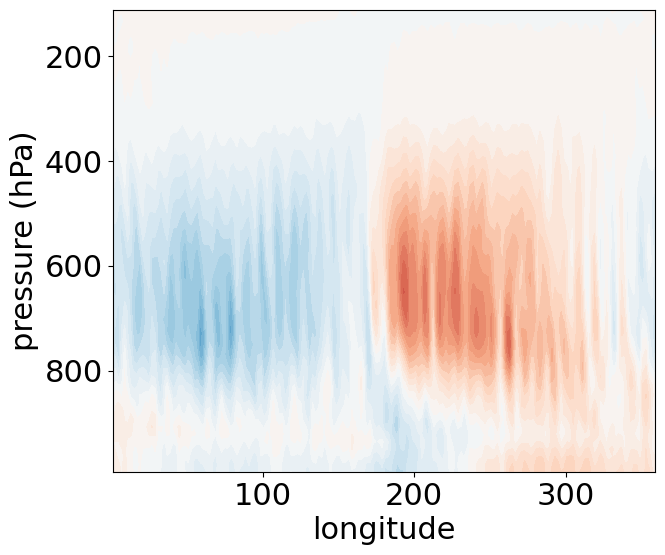

mse


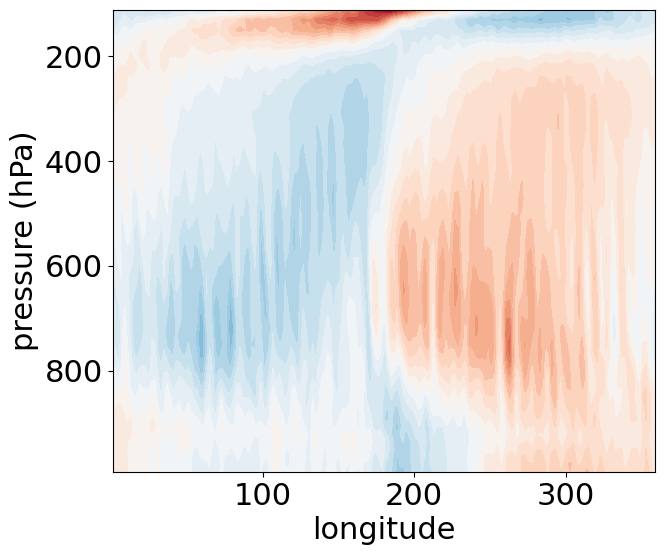

In [46]:
vmin = -300
vmax = 300
cbflg = False
print('dtdse')
plot_comp(comp['dtdse'], vmin=vmin, vmax=vmax, cbflg=cbflg)
print('dtqlv')
plot_comp(comp['dtqlv'], vmin=vmin, vmax=vmax, cbflg=cbflg)
print('mse')
plot_comp(comp['dtdse']+comp['dtqlv'], vmin=vmin, vmax=vmax, cbflg=cbflg)


dyn_dse


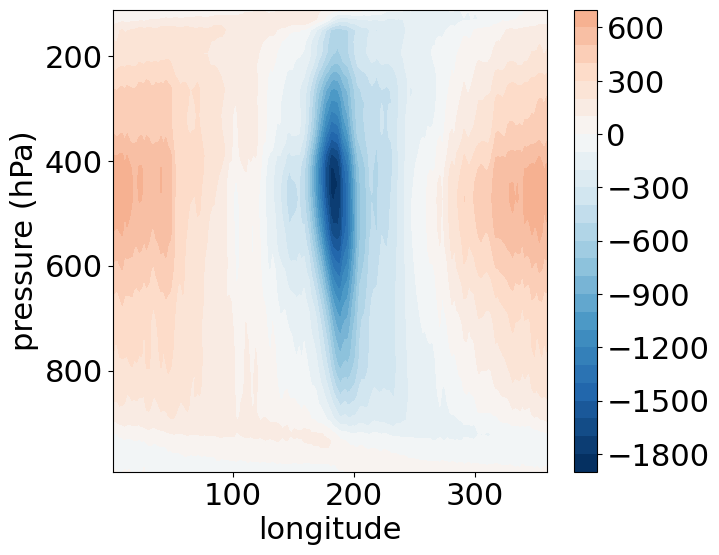

dyn_qlv


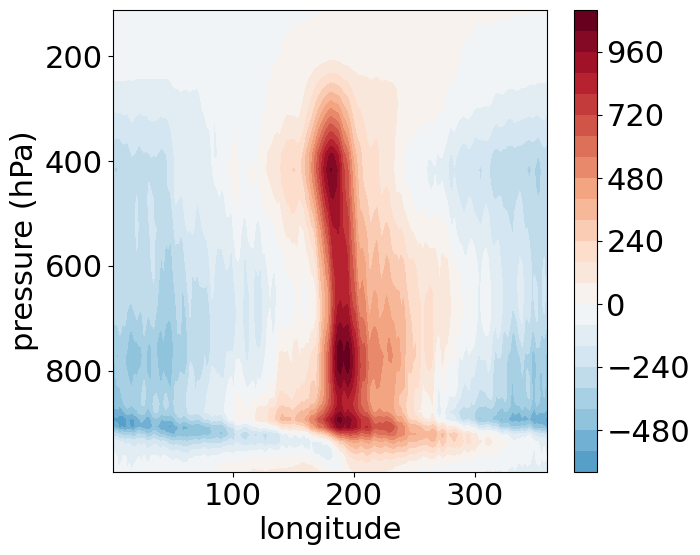

mse


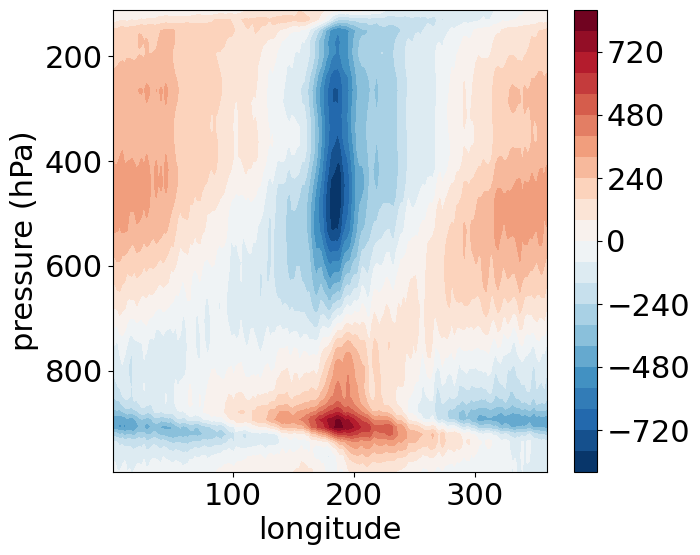

In [37]:
print('dyn_dse')
plot_comp(comp['dyn_dse'], vmin=None, vmax=None, cbflg=True)
print('dyn_qlv')
plot_comp(comp['dyn_qlv'], vmin=None, vmax=None, cbflg=True)
print('mse')
plot_comp(comp['dyn_dse']+comp['dyn_qlv'], vmin=None, vmax=None, cbflg=True)


dtdse


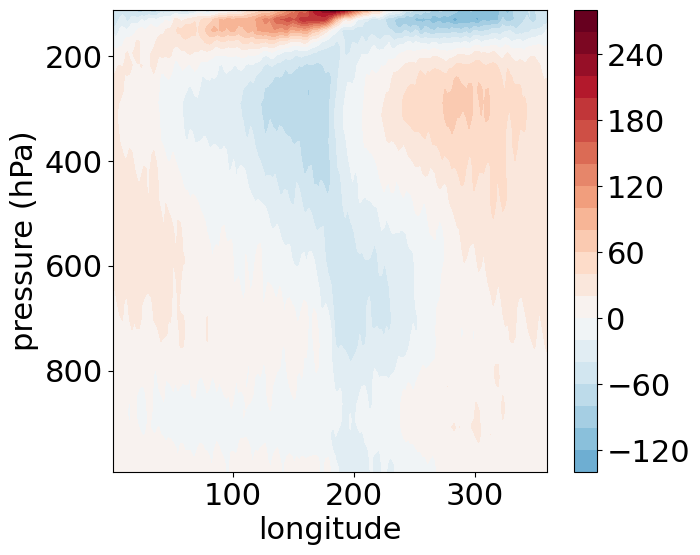

dtqlv


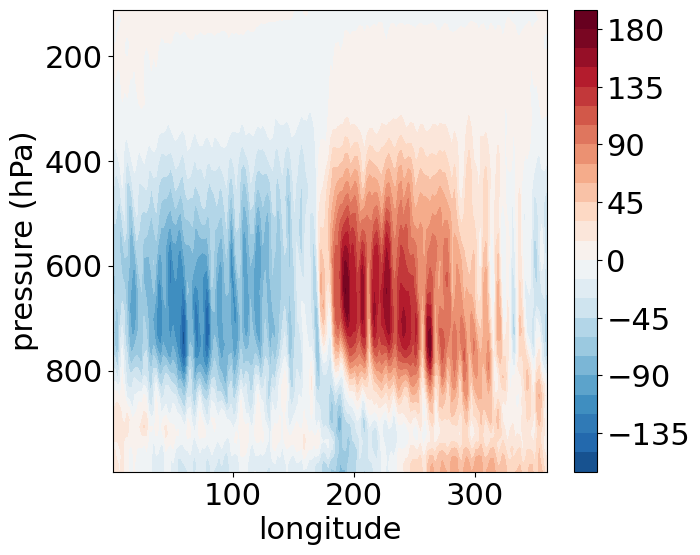

mse


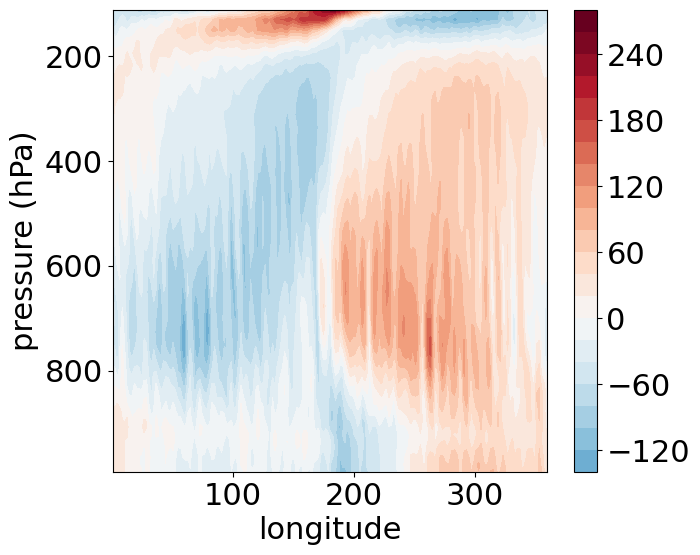

crm_dse


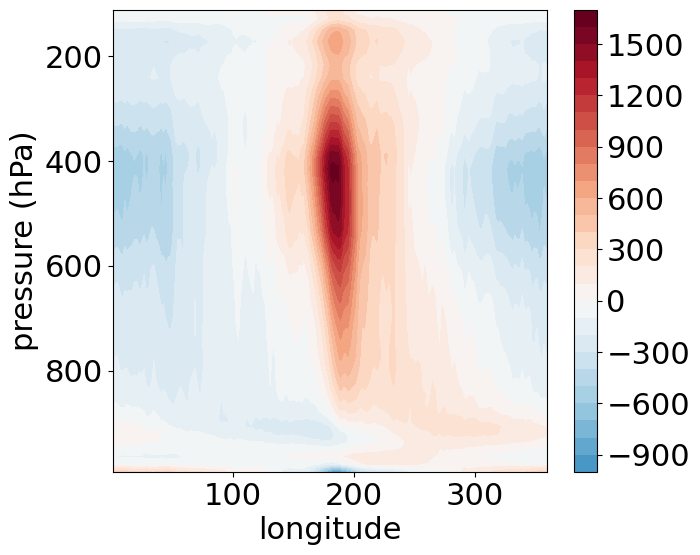

crm_qlv


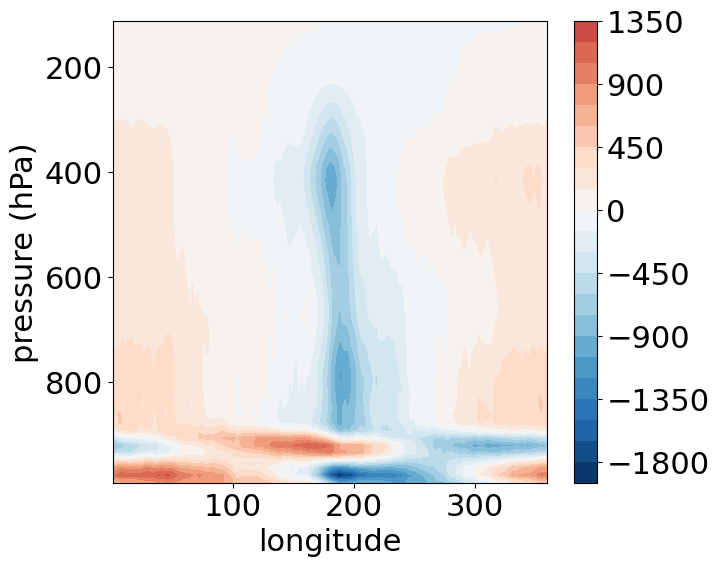

mse


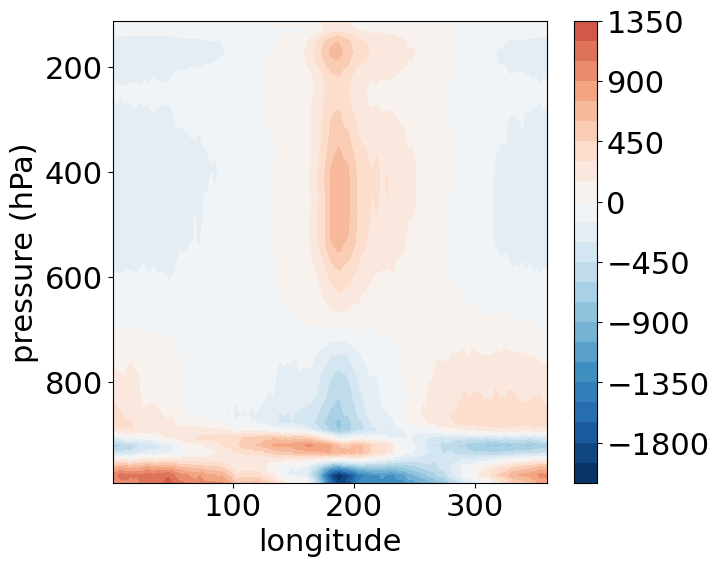

pbl_dse


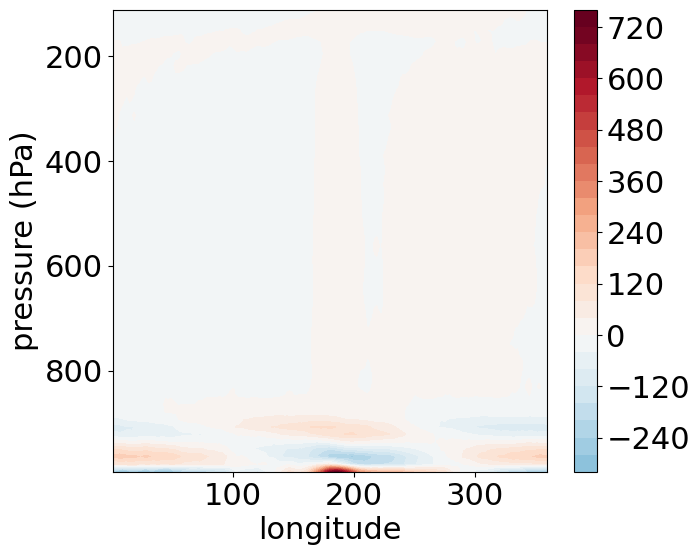

pbl_qlv


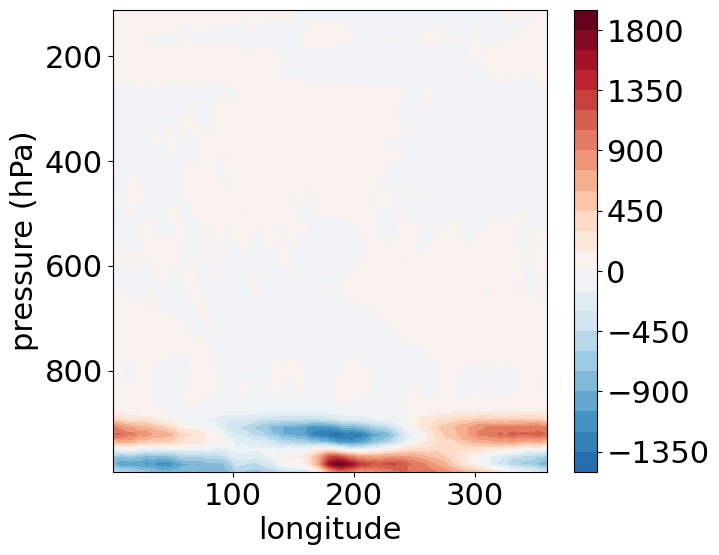

mse


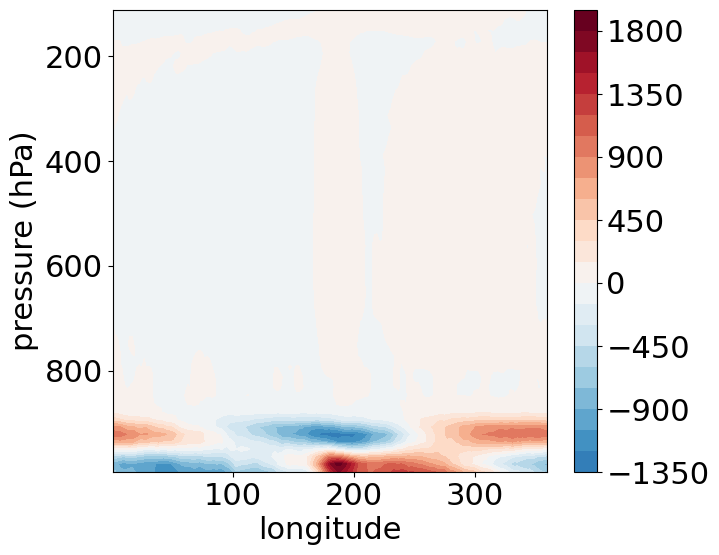

qr


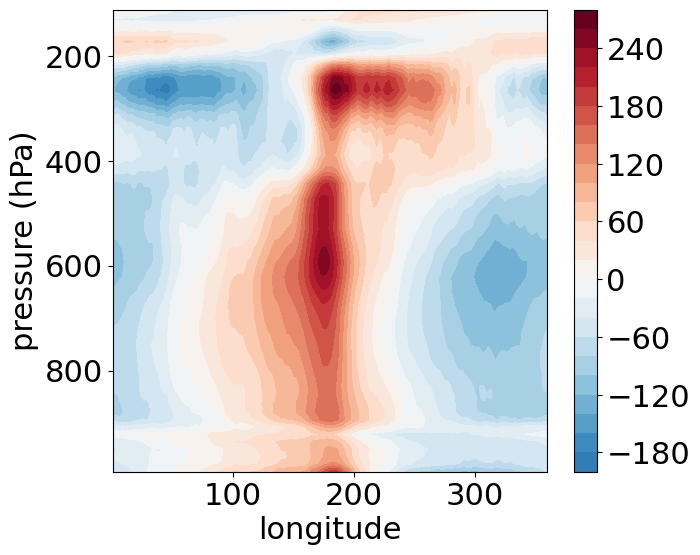

dyn_dse


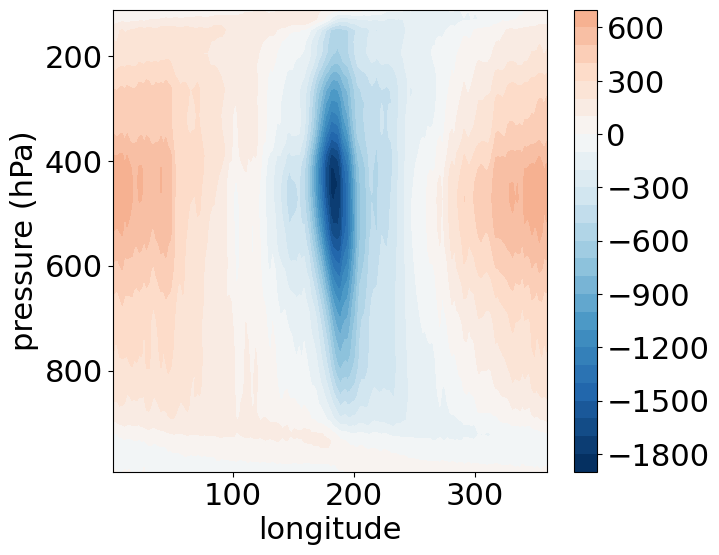

mse


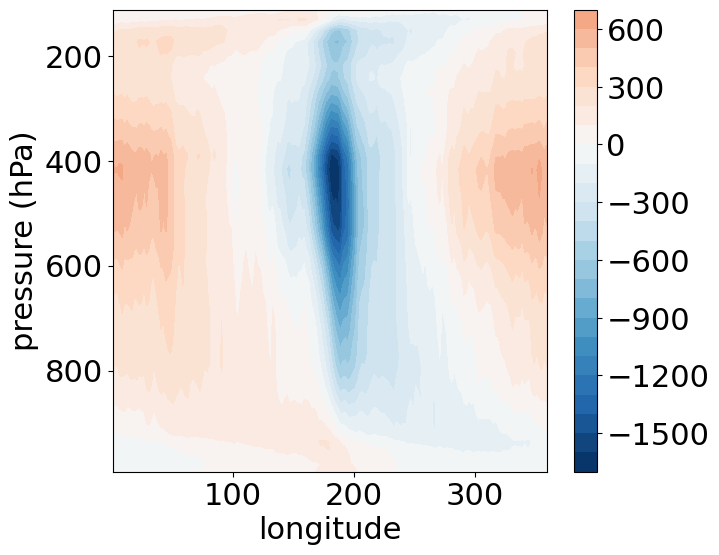

In [36]:
vmin = -1000
vmax = 1000
keys = list(comp.keys())[2:]
for key0,key1 in zip(keys[::2], keys[1::2]):
    print(key0)
    plot_comp(comp[key0], vmin=None, vmax=None, cbflg=True)
    print(key1)
    plot_comp(comp[key1], vmin=None, vmax=None, cbflg=True)
    print('mse')
    plot_comp(comp[key0]+comp[key1], vmin=None, vmax=None, cbflg=True)


dse


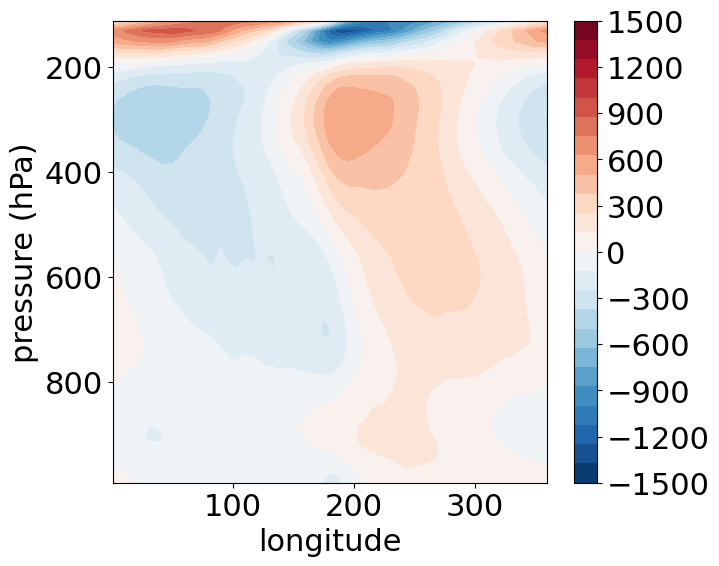

In [21]:
vmin = -1500
vmax = 1500
print('dse')
plot_cb(comp['dse'], vmin=vmin, vmax=vmax)

dse


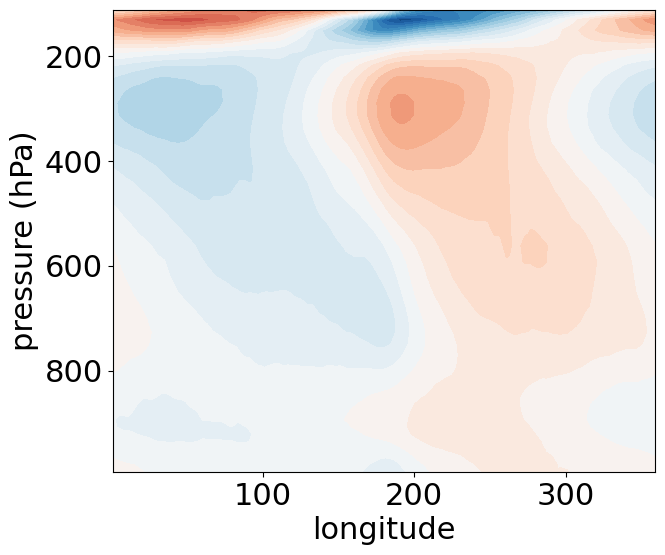

qlv


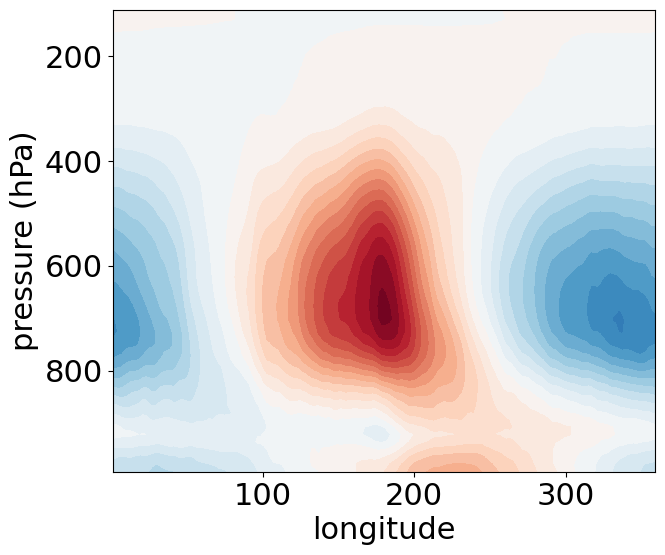

mse


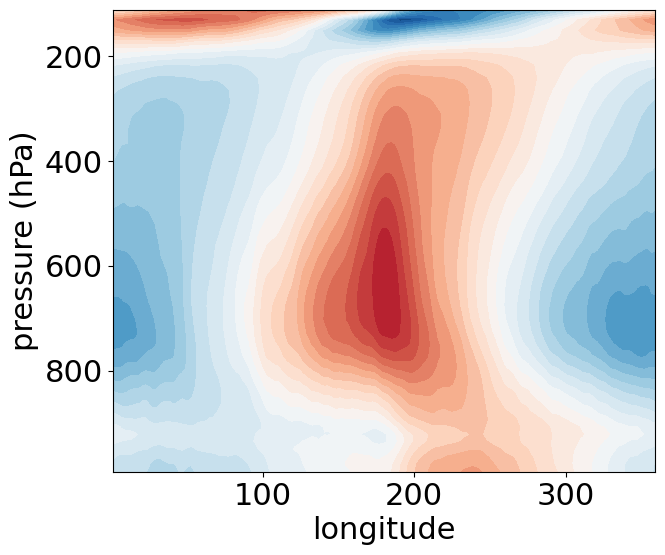

In [9]:
vmin = -1500
vmax = 1500
print('dse')
plot_comp(comp['dse'], vmin=vmin, vmax=vmax)
print('qlv')
plot_comp(comp['qlv'], vmin=vmin, vmax=vmax)
print('mse')
plot_comp(comp['dse']+comp['qlv'], vmin=vmin, vmax=vmax)

In [2]:
import pickle
dirn = '/pscratch/sd/l/linyaoly/MJO_E3SM/regridded_data/'
z200 = pickle.load(open(dirn+'analysis/z200_composite_control_latavg.json', 'rb'))
olr = pickle.load(open(dirn+'analysis/prep_composite_control_latavg.json', 'rb'))

In [3]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1,1, figsize=(12,6))
# im = ax.contour(z200.lon, z200.lat, z200,colors='k', levels=7, vmin=-15, vmax=15)
# im1 = ax.contourf(olr.lon, olr.lat, olr, cmap='RdBu_r', levels=9, vmin=-20, vmax=20)
im = ax.contour(z200.lon, z200.lat, z200,colors='k', levels=7, vmin=-15, vmax=15)
im1 = ax.contourf(olr.lon, olr.lat, olr*10, cmap='RdBu', levels=9, vmin=-4, vmax=4)  # convert to mm/day

# ax.set_xlabel('longitude')
# ax.set_ylabel('latitude')
ax.invert_yaxis()
ax.set_title('Z200 (line) and Prep (color)', pad=20)

plt.colorbar(im1)
plt.clabel(im, inline=5, fontsize=15)
plt.show()

NameError: name 'plt' is not defined

In [3]:
import pickle
fn = '/pscratch/sd/l/linyaoly/MJO_E3SM/regridded_data/analysis/local_MSE_budget/local_MSE_budget_composite_control_latavg_backup.json'
with open(fn, 'rb') as f:
    comp = pickle.load(f)

In [32]:
def plot_local_MSE_budget_composite(data, key, vmin=-0.5, vmax=0.5):
    plt.rcParams.update({'font.size': 20})
    fig, ax = plt.subplots(1,1, figsize=(8,6))
    im = ax.contourf(data.lon, data.lev, data, cmap='RdBu_r', levels=25, vmin=vmin, vmax=vmax)
    ax.set_xlabel('longitude')
    ax.set_ylabel('pressure (hPa)')
    ax.invert_yaxis()
    ax.set_title(key, pad=20)
    plt.colorbar(im)
    plt.show()

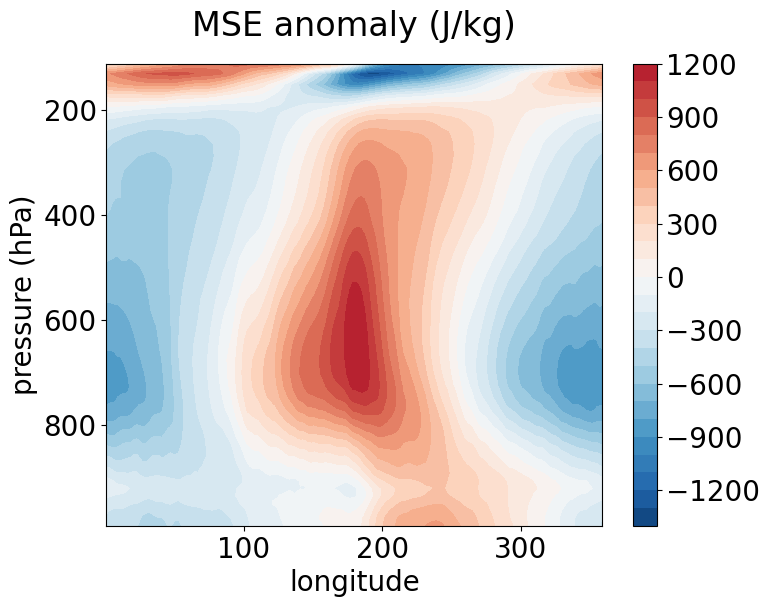

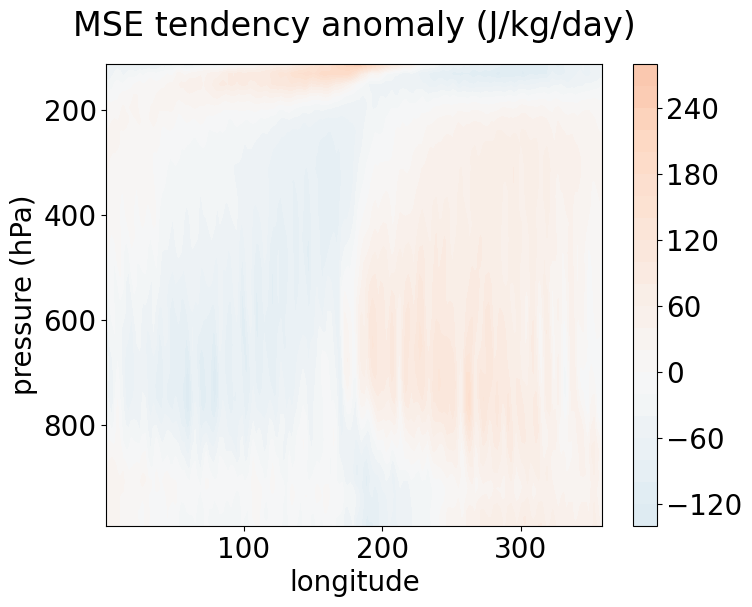

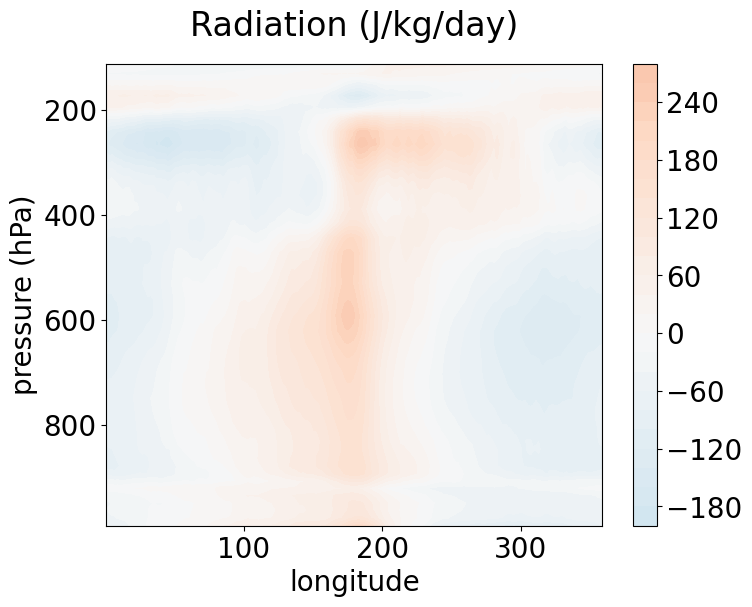

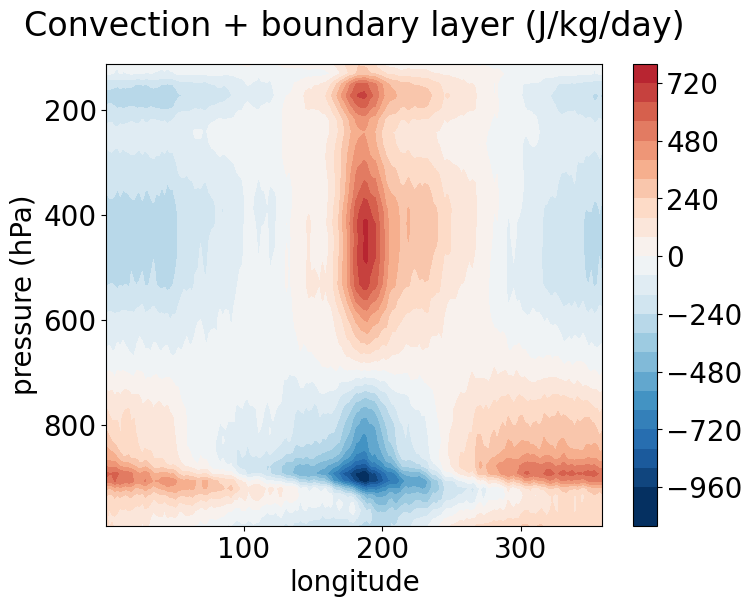

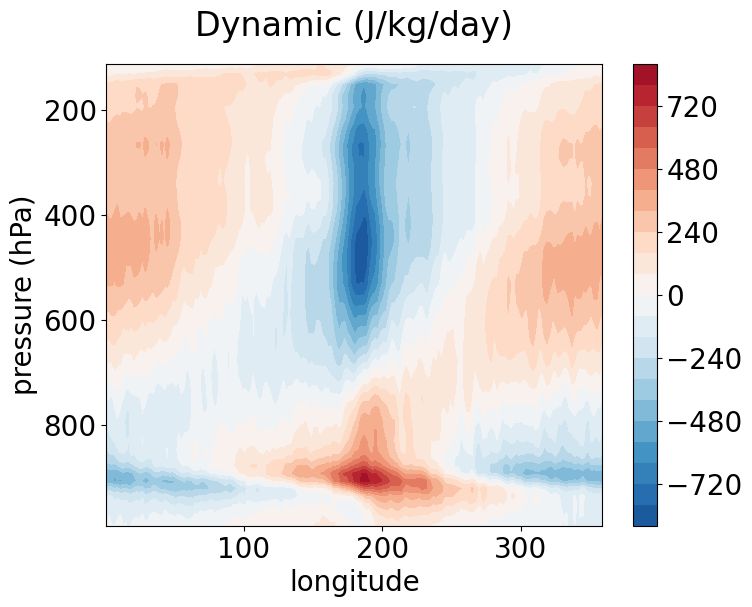

In [36]:
plot_local_MSE_budget_composite(comp['mse'], 'MSE anomaly (J/kg)', vmin=-1500, vmax=1500)
plot_local_MSE_budget_composite(comp['tendency'], 'MSE tendency anomaly (J/kg/day)', vmin=-1000, vmax=1000)
plot_local_MSE_budget_composite(comp['qr'], 'Radiation (J/kg/day)', vmin=-1000, vmax=1000)
plot_local_MSE_budget_composite(comp['crmalt']+comp['pbl'], 'Convection + boundary layer (J/kg/day)', vmin=-1000, vmax=1000)
plot_local_MSE_budget_composite(comp['dyn'], 'Dynamic (J/kg/day)', vmin=-1000, vmax=1000)

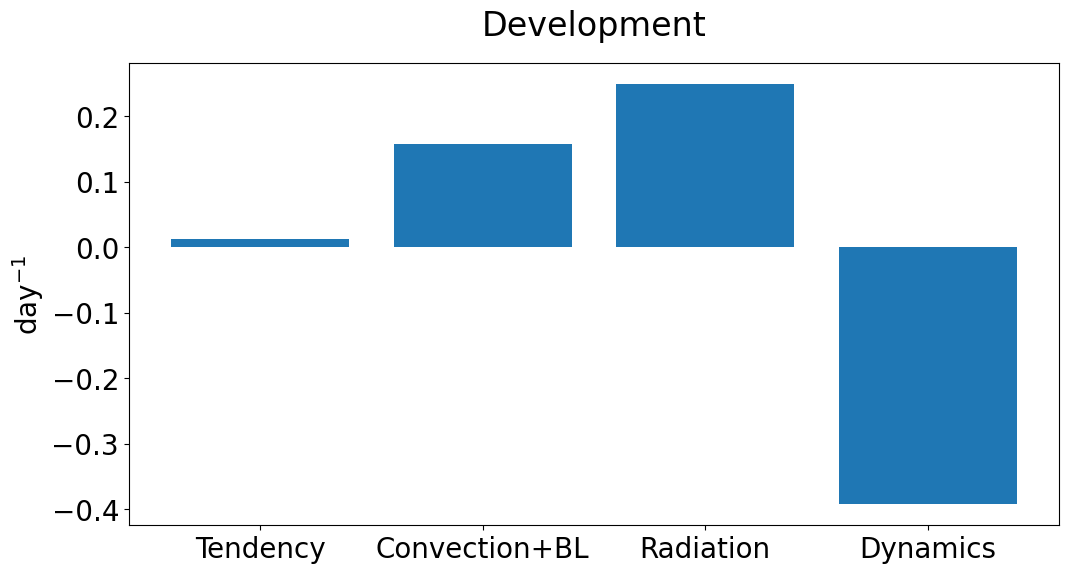

In [44]:
local_budget_develop = {}
p = comp['mse']['lev']  # dataarray
dp = np.zeros(len(p))
dp[1:] = p[1:].values - p[0:-1].values
dp[0] = dp[1]  # hPa

dp = xr.DataArray(dp, dims='lev', coords={'lev': p})

for key in comp.keys():
    tmp = (comp['mse'] * comp[key]).mean(dim='lon')
    local_budget_develop[key] = (tmp * dp / 9.8 * 100).sum(dim='lev').values

# Creating the bar plot
data = {}
norm = local_budget_develop['mse'] * 0.5
data['Tendency'] = local_budget_develop['tendency'] / norm
data['Convection+BL'] = (local_budget_develop['crmalt'] + local_budget_develop['pbl']) / norm
data['Radiation'] = local_budget_develop['qr'] / norm 
data['Dynamics'] = local_budget_develop['dyn'] / norm

plt.figure(figsize=(12, 6))
plt.bar(data.keys(), data.values(), color='tab:blue')

plt.ylabel('day'+r'$^{-1}$')
plt.title('Development', pad=20)
plt.show()

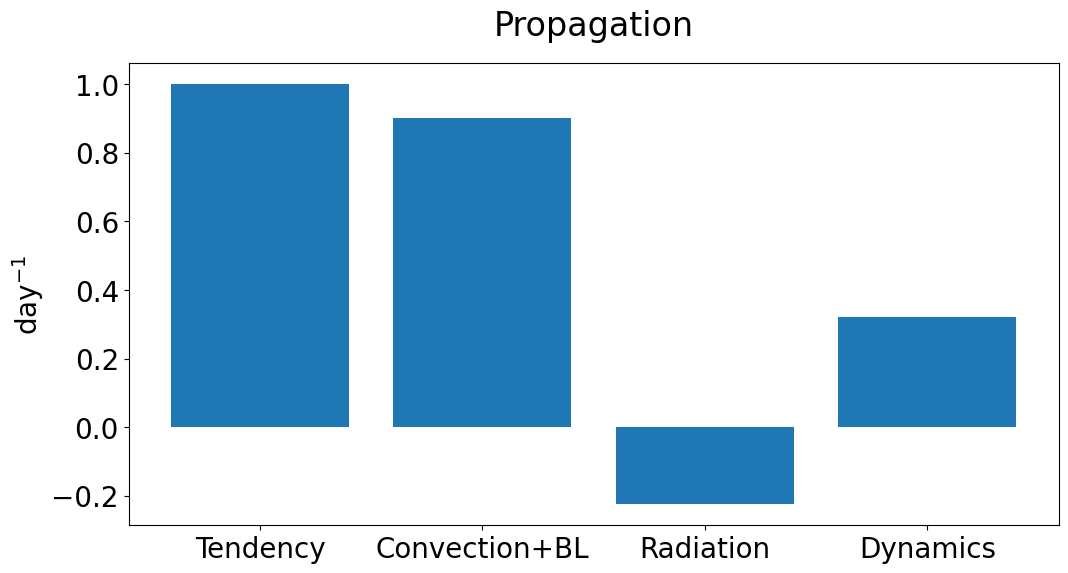

In [45]:
local_budget_prog = {}
p = comp['mse']['lev']  # dataarray
dp = np.zeros(len(p))
dp[1:] = p[1:].values - p[0:-1].values
dp[0] = dp[1]  # hPa

dp = xr.DataArray(dp, dims='lev', coords={'lev': p})

for key in comp.keys():
    tmp = (comp['tendency'] * comp[key]).mean(dim='lon')
    local_budget_prog[key] = (tmp * dp / 9.8 * 100).sum(dim='lev').values

# Creating the bar plot
data = {}
norm = local_budget_prog['tendency'] 
data['Tendency'] = local_budget_prog['tendency'] / norm
data['Convection+BL'] = (local_budget_prog['crmalt'] + local_budget_prog['pbl']) / norm
data['Radiation'] = local_budget_prog['qr'] / norm 
data['Dynamics'] = local_budget_prog['dyn'] / norm

plt.figure(figsize=(12, 6))
plt.bar(data.keys(), data.values(), color='tab:blue')

plt.ylabel('day'+r'$^{-1}$')
plt.title('Propagation', pad=20)
plt.show()

In [4]:
# calculate the MSE budget 
# The composites are based on Ma's paper

# directory that stores all case data
dirn = '/pscratch/sd/l/linyaoly/MJO_E3SM/regridded_data/'
# specify which case we use
case_dir = 'control'

lat_lim = 10

ndays = 1000

In [5]:
# read all files in the case directory
import glob
files_path = dirn + case_dir + '/3D/'

# Find all .nc files in the directory
nc_files = sorted(glob.glob(f"{files_path}/*.nc"))

ds = xr.open_mfdataset(nc_files[-ndays:])


In [6]:
files_path = dirn + case_dir + '/'

# Find all .nc files in the directory
nc_files = sorted(glob.glob(f"{files_path}/*.nc"))

ds1 = xr.open_mfdataset(nc_files[-ndays:])

In [7]:
# average the OLR over 10S-10N
olr = ds1['FLNT'].sel(lat=slice(-lat_lim,lat_lim)).resample(time='1D').mean().load()
olravg = olr.mean(dim='lat') # average over 10S-10N

# filter the olr data (k=1-9, f=0.01-0.05)
# olravg[time, lon]

olrflt = mjo.get_MJO_signal(olravg, d=1, kmin=1, kmax=9, flow=0.01, fhig=0.05)
# get the location of the miminum OLR
olrmin = olrflt.argmin(dim='lon')

In [8]:
mse_budget = mjo.get_local_MSE_budget(ds, lat_lim=lat_lim, plim=100, latmean=True)

In [9]:
comp = mjo.get_local_MSE_budget_composite(mse_budget, olrmin)


In [11]:
comp.keys()

dict_keys(['mse', 'tendency', 'crm', 'crmalt', 'pbl', 'qr', 'dyn'])

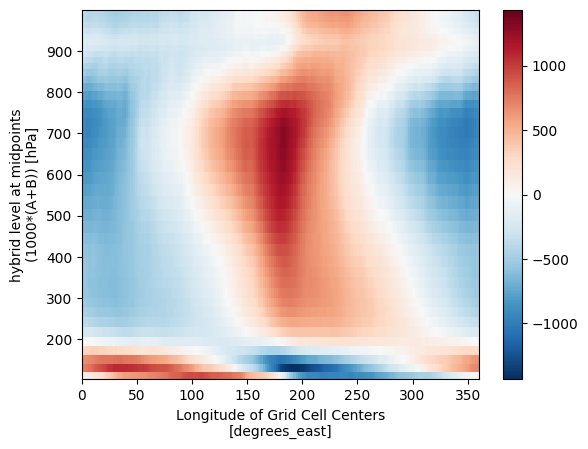

In [25]:
comp['mse'].plot()

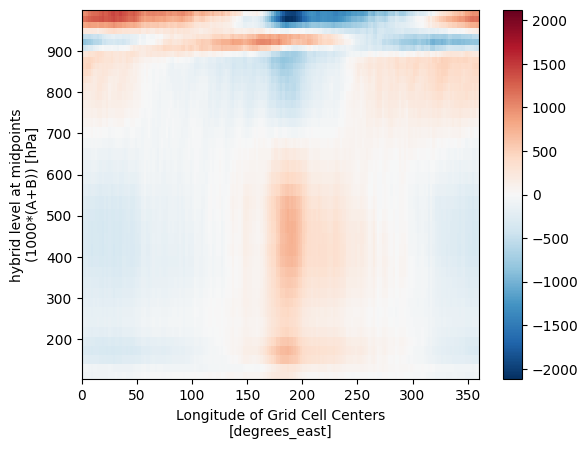

In [26]:
comp['crmalt'].plot()

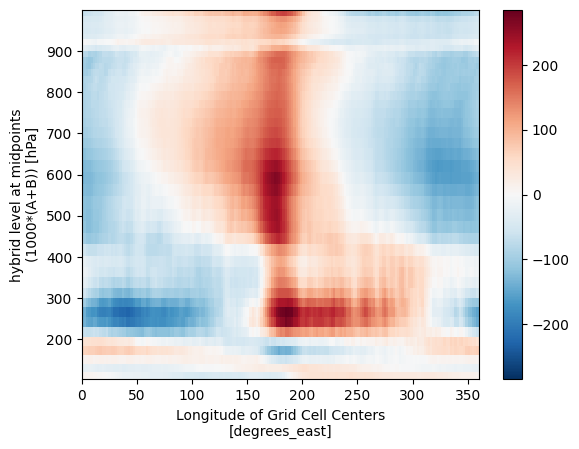

In [27]:
comp['qr'].plot()

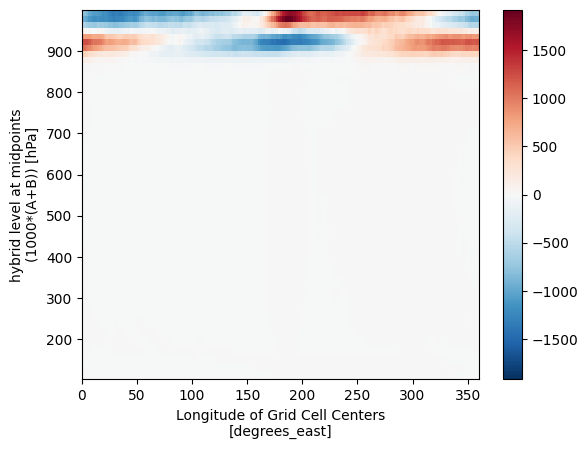

In [28]:
comp['pbl'].plot()

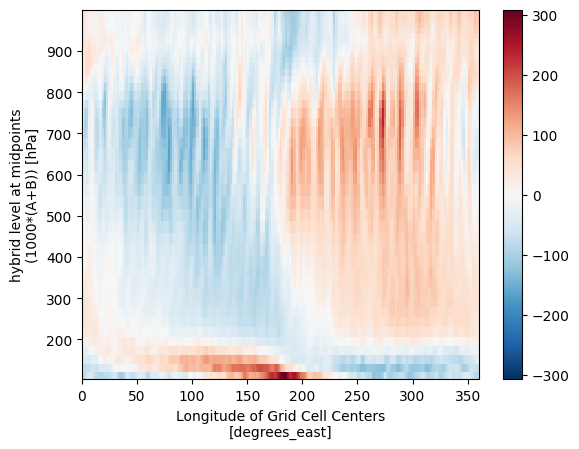

In [29]:
comp['tendency' ].plot()

In [30]:
local_budget_develop = {}
p = comp['mse']['lev']  # dataarray
dp = np.zeros(len(p))
dp[1:] = p[1:].values - p[0:-1].values
dp[0] = dp[1]  # hPa

dp = xr.DataArray(dp, dims='lev', coords={'lev': p})

for key in comp.keys():
    tmp = (comp['mse'] * comp[key]).mean(dim='lon')
    local_budget_develop[key] = (tmp * dp / 9.8 * 100).sum(dim='lev').values


In [31]:
local_budget_develop

{'mse': array(2.44860628e+09),
 'tendency': array(22172906.30155005),
 'crm': array(-19354394.46865112),
 'crmalt': array(92645882.02068919),
 'pbl': array(1.02236841e+08),
 'qr': array(3.10199691e+08),
 'dyn': array(-4.8214581e+08)}

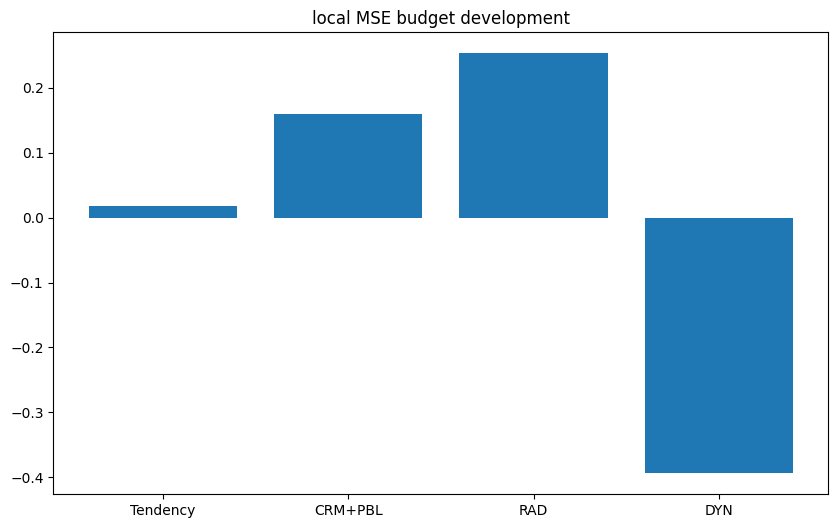

In [33]:
# Creating the bar plot
data = {}
norm = local_budget_develop['mse'] * 0.5
data['Tendency'] = local_budget_develop['tendency'] / norm
data['CRM+PBL'] = (local_budget_develop['crmalt'] + local_budget_develop['pbl']) / norm
data['RAD'] = local_budget_develop['qr'] / norm 
data['DYN'] = local_budget_develop['dyn'] / norm

plt.figure(figsize=(10, 6))
plt.bar(data.keys(), data.values(), color='tab:blue')

plt.title('local MSE budget development')
plt.show()

In [34]:
local_budget_prog = {}
p = comp['mse']['lev']  # dataarray
dp = np.zeros(len(p))
dp[1:] = p[1:].values - p[0:-1].values
dp[0] = dp[1]  # hPa

dp = xr.DataArray(dp, dims='lev', coords={'lev': p})

for key in comp.keys():
    tmp = (comp['tendency'] * comp[key]).mean(dim='lon')
    local_budget_prog[key] = (tmp * dp / 9.8 * 100).sum(dim='lev').values


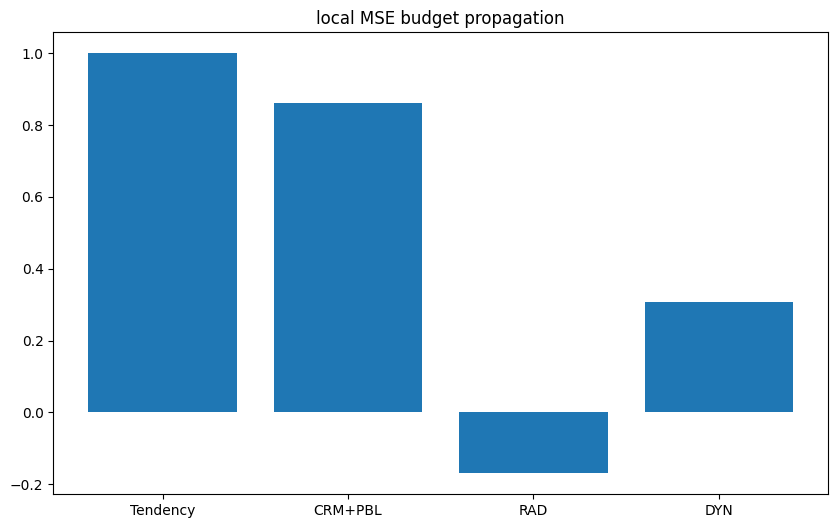

In [35]:
local_budget_prog = {}
p = comp['mse']['lev']  # dataarray
dp = np.zeros(len(p))
dp[1:] = p[1:].values - p[0:-1].values
dp[0] = dp[1]  # hPa

dp = xr.DataArray(dp, dims='lev', coords={'lev': p})

for key in comp.keys():
    tmp = (comp['tendency'] * comp[key]).mean(dim='lon')
    local_budget_prog[key] = (tmp * dp / 9.8 * 100).sum(dim='lev').values

# Creating the bar plot
data = {}
norm = local_budget_prog['tendency'] 
data['Tendency'] = local_budget_prog['tendency'] / norm
data['CRM+PBL'] = (local_budget_prog['crmalt'] + local_budget_prog['pbl']) / norm
data['RAD'] = local_budget_prog['qr'] / norm 
data['DYN'] = local_budget_prog['dyn'] / norm

plt.figure(figsize=(10, 6))
plt.bar(data.keys(), data.values(), color='tab:blue')

plt.title('local MSE budget propagation')
plt.show()

## parameters

In [101]:
# directory that stores all case data
dirn = '/pscratch/sd/l/linyaoly/MJO_E3SM/regridded_data/'
# specify which case we use
case_dir = 'control'
lat_lim = 10
ndays = 200

## get reference OLR

In [102]:
# read all files in the case directory
import glob
files_path = dirn + case_dir + '/'
# Find all .nc files in the directory
nc_files = sorted(glob.glob(f"{files_path}/*.nc"))
ds1 = xr.open_mfdataset(nc_files[-ndays:])
olr_sel = ds1['FLNT'].sel(lat=slice(-5,5)).resample(time='1D').mean().load().mean('lat')  # OLR[time, lon]
olr_flt = mjo.get_MJO_signal(olr_sel)

In [103]:
# read all files in the case directory
import glob
files_path = dirn + case_dir + '/3D/'
# Find all .nc files in the directory
nc_files = sorted(glob.glob(f"{files_path}/*.nc"))
ds = xr.open_mfdataset(nc_files[-ndays:])
local_MSE_budget = mjo.get_reg_local_MSE_budegt(ds, olr_flt, lat_lim=lat_lim, latmean=False)

In [106]:
# If latmean=False, local_MSE_budget is [lev, lat, lon]
latmean = False

In [107]:
if latmean:
    fn = '/pscratch/sd/l/linyaoly/MJO_E3SM/regridded_data/analysis/local_MSE_budget/local_MSE_budget_latavg'+str(lat_lim)+'.json'
else:
    fn = '/pscratch/sd/l/linyaoly/MJO_E3SM/regridded_data/analysis/local_MSE_budget/local_MSE_budget'+str(lat_lim)+'.json'

import os 
import json

os.makedirs(os.path.dirname(fn), exist_ok=True)
# Loop through the dictionary to convert ndarray to list
for key, value in local_MSE_budget.items():
    if isinstance(value, np.ndarray):
        local_MSE_budget[key] = value.tolist()

# Store to JSON file
with open(fn, 'w') as f:
    json.dump(local_MSE_budget, f)


In [137]:
# Load from JSON file
if latmean:
    fn = '/pscratch/sd/l/linyaoly/MJO_E3SM/regridded_data/analysis/local_MSE_budget/local_MSE_budget_latavg'+str(lat_lim)+'.json'
else:
    fn = '/pscratch/sd/l/linyaoly/MJO_E3SM/regridded_data/analysis/local_MSE_budget/local_MSE_budget'+str(lat_lim)+'.json'

with open(fn, 'r') as f:
    local_MSE_budget = json.load(f)
for key, value in local_MSE_budget.items():
    if isinstance(value, list):
        local_MSE_budget[key] = np.array(value)

In [109]:
def plot_local_budget(ds, local_MSE_budget, key):
    plt.rc('font', size=22)
    plt.contourf(ds.lon, ds.sel(lev=slice(100, None)).lev, local_MSE_budget[key], cmap='RdBu_r', levels=15, vmin=-900, vmax=900)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.xlabel('longitude')
    plt.ylabel('pressure (hPa)')
    if key == 'MSE':
        plt.title(f'{key} anomaly (J/kg)', y=1.05)
    # elif key == 'PBL':
    #     plt.title('PBL (J/m2/day)', y=1.05)
    # elif key == 'MSE_CRM':
    #     plt.title('CRM (J/m2/day)', y=1.05)
    # elif key == 'MSE_QR':
    #     plt.title('RAD (J/m2/day)', y=1.05)
    # elif key == 'MSE_DYN':
    #     plt.title('DYN (J/m2/day)', y=1.05)
    elif key == 'TEND':
        plt.title('MSE tendency anomaly (J/m2/day)', y=1.05)
    else:
        plt.title(f'{key} (J/m2/day)', y=1.05)
    plt.show()

In [110]:
if latmean:
    plot_local_budget(ds, local_MSE_budget, 'MSE')
    plot_local_budget(ds, local_MSE_budget, 'TEND')
    plot_local_budget(ds, local_MSE_budget, 'DYN')  
    plot_local_budget(ds, local_MSE_budget, 'RAD')
    plot_local_budget(ds, local_MSE_budget, 'CRM')
    plot_local_budget(ds, local_MSE_budget, 'CRMALT')
    plot_local_budget(ds, local_MSE_budget, 'PBL')

In [78]:
# def plot_local_budget(ds, local_MSE_budget, key):
#     plt.rc('font', size=22)
#     plt.contourf(ds.lon, ds.sel(lev=slice(100, None)).lev, local_MSE_budget[key] * local_MSE_budget['MSE'], cmap='RdBu_r', levels=15, vmin=-1.2e6, vmax=1.2e6)
#     plt.colorbar()
#     plt.gca().invert_yaxis()
#     plt.xlabel('longitude')
#     plt.ylabel('pressure (hPa)')
#     if key == 'MSE':
#         plt.title(f'{key} anomaly (J/kg)', y=1.05)
#     elif key == 'MSE_CRMPBL':
#         plt.title('CRM + PBL', y=1.05)
#     elif key == 'MSE_QR':
#         plt.title('RAD', y=1.05)
#     elif key == 'MSE_DYN':
#         plt.title('DYN', y=1.05)
#     elif key == 'MSE_TEND':
#         plt.title('TEND', y=1.05)
#     plt.show()

In [79]:
# plot_local_budget(ds, local_MSE_budget, 'MSE_TEND')
# plot_local_budget(ds, local_MSE_budget, 'MSE_DYN')  
# plot_local_budget(ds, local_MSE_budget, 'MSE_QR')
# plot_local_budget(ds, local_MSE_budget, 'MSE_CRMPBL')

20

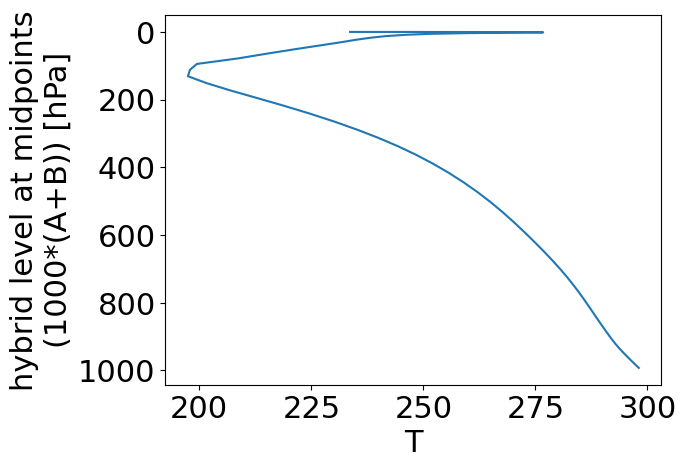

In [118]:
ds['T'].sel(lat=slice(-10, 10)).mean(dim=["time","lat","lon"]).plot(y="lev", yincrease=False)
T = ds['T'].sel(lat=slice(-10, 10)).mean(dim=["time","lat","lon"]).values
np.argmin(T)

In [120]:
ds['lev']

<xarray.DataArray 'lev' (lev: 60)>
array([7.834781e-02, 1.411083e-01, 2.529233e-01, 4.492506e-01, 7.863462e-01,
       1.347356e+00, 2.244777e+00, 3.616431e+00, 5.615836e+00, 8.403253e+00,
       1.214449e+01, 1.701683e+01, 2.321080e+01, 3.091435e+01, 4.027758e+01,
       5.137463e+01, 6.418923e+01, 7.863966e+01, 9.463009e+01, 1.120913e+02,
       1.309778e+02, 1.512213e+02, 1.726739e+02, 1.950877e+02, 2.181559e+02,
       2.416004e+02, 2.652585e+02, 2.891223e+02, 3.133121e+02, 3.380070e+02,
       3.633735e+02, 3.895233e+02, 4.165079e+02, 4.443314e+02, 4.729572e+02,
       5.022919e+02, 5.321523e+02, 5.622394e+02, 5.921493e+02, 6.214328e+02,
       6.496899e+02, 6.766565e+02, 7.022422e+02, 7.264986e+02, 7.495376e+02,
       7.714452e+02, 7.922343e+02, 8.118567e+02, 8.302596e+02, 8.474507e+02,
       8.635359e+02, 8.787159e+02, 8.932460e+02, 9.073852e+02, 9.213544e+02,
       9.353167e+02, 9.493781e+02, 9.635996e+02, 9.780134e+02, 9.926355e+02])
Coordinates:
  * lev      (lev) float64 0.07835 0.1411 0.2529 0.4493 ... 963.6 978.0 992.6
Attributes:
    long_name:      hybrid level at midpoints (1000*(A+B))
    units:          hPa
    positive:       down
    standard_name:  atmosphere_hybrid_sigma_pressure_coordinate
    formula_terms:  a: hyam b: hybm p0: P0 ps: PS

In [119]:
ds['lev'][20]

<xarray.DataArray 'lev' ()>
array(130.97780379)
Coordinates:
    lev      float64 131.0
Attributes:
    long_name:      hybrid level at midpoints (1000*(A+B))
    units:          hPa
    positive:       down
    standard_name:  atmosphere_hybrid_sigma_pressure_coordinate
    formula_terms:  a: hyam b: hybm p0: P0 ps: PS

In [121]:
local_MSE_budget['MSE'].shape

(41, 10, 180)

In [125]:
local_variance_budget = {}
if latmean:
    for key, values in local_MSE_budget.items():
        local_variance_budget[key] = (local_MSE_budget[key] * local_MSE_budget['MSE']).mean(axis=1)
else:
    for key, values in local_MSE_budget.items():
        local_variance_budget[key] = (local_MSE_budget[key] * local_MSE_budget['MSE']).mean(axis=-1).mean(axis=-1)

Text(0, 0.5, 'pressure (hPa)')

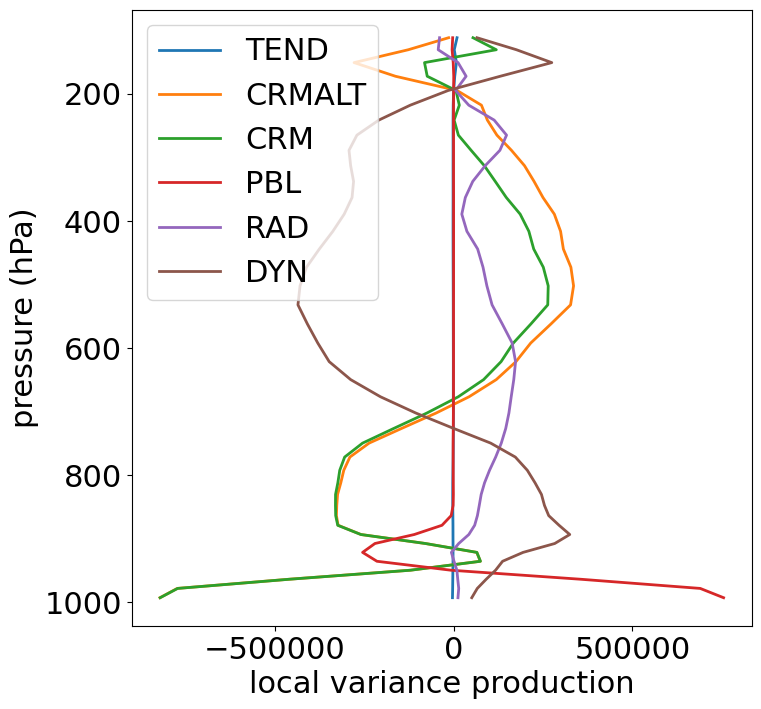

In [126]:
fig, ax = plt.subplots(figsize=(8, 8))

for key in local_variance_budget.keys():
    if key != 'MSE':
        ax.plot(local_variance_budget[key], ds.sel(lev=slice(100, None)).lev, label=key, linewidth=2)
ax.legend()
plt.gca().invert_yaxis()
plt.xlabel('local variance production')
plt.ylabel('pressure (hPa)')

In [82]:
# norm = sum(local_variance_budget['MSE'] * dp / 9.8 * 100) * 0.5
# fig, ax = plt.subplots(figsize=(12, 8))
# for key in local_variance_budget.keys():
#     if key != 'MSE':
#         ax.plot(local_variance_budget[key] / norm, ds.sel(lev=slice(100, None)).lev, label=key, linewidth=2)
# ax.legend()
# plt.gca().invert_yaxis()
# plt.xlabel('Normalized variance production')
# plt.ylabel('pressure (hPa)')

In [83]:
# variance_budget = {}
# p = ds['lev'].sel(lev=slice(100, None))
# dp = np.empty(len(p))
# dp[0] = p[1].values - p[0].values
# dp[1:] = p[1:].values - p[:-1].values
# for key in local_variance_budget.keys():
#     if key != 'MSE':
#         variance_budget[key] = sum(local_variance_budget[key] * dp / 9.8 * 100)

In [84]:
# plt.figure(figsize=(14, 4))
# plt.rc('font', size=22)  # Set default font size

# # Extract keys and values from the dictionary
# keys = list(variance_budget.keys())
# values = list(variance_budget.values())

# # Create the bar plot
# plt.bar(['TEND','CRM+PBL','CRM','PBL','RAD','DYN'], values, color='blue')

# plt.xlabel('Terms')
# plt.ylabel('Value')
# plt.title('Variance Budget')

# # # Show numerical values on top of each bar
# # for i, value in enumerate(values):
# #     plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

In [129]:
variance_budget = {}
p = ds['lev'].sel(lev=slice(100, None))
dp = np.empty(len(p))
dp[0] = p[1].values - p[0].values
dp[1:] = p[1:].values - p[:-1].values
norm = sum(local_variance_budget['MSE'][1:] * dp[1:] / 9.8 * 100) * 0.5

for key in local_variance_budget.keys():
    if key != 'MSE':
        variance_budget[key] = sum(local_variance_budget[key] * dp / 9.8 * 100) / norm

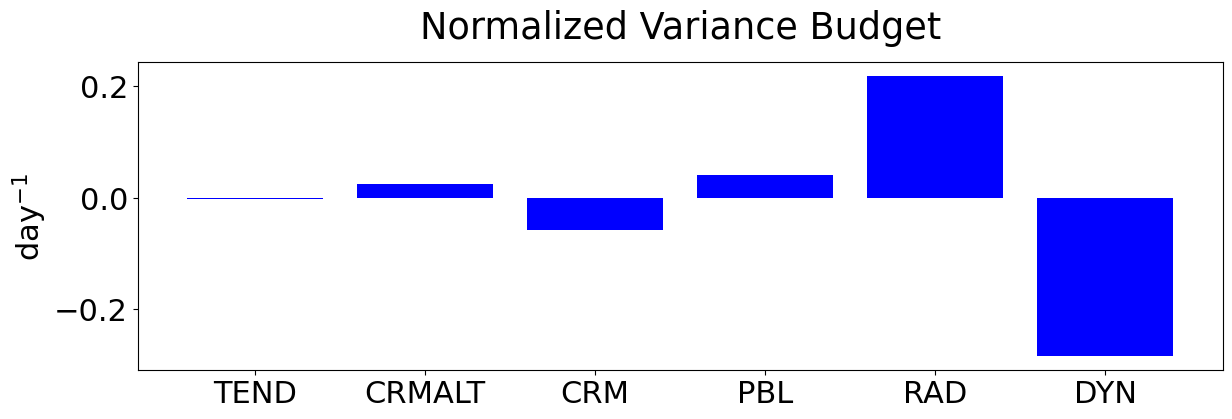

In [130]:
plt.figure(figsize=(14, 4))
plt.rc('font', size=22)  # Set default font size

# Extract keys and values from the dictionary
keys = list(variance_budget.keys())
values = list(variance_budget.values())

# Create the bar plot
plt.bar(keys, values, color='blue')

plt.ylabel('day$^{-1}$')
plt.title('Normalized Variance Budget', y=1.05)

# # Show numerical values on top of each bar
# for i, value in enumerate(values):
#     plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

# Local MSE variance budget for MJO propagation.

In [139]:
local_propagation = {}
if latmean:
    for key, values in local_MSE_budget.items():
        if key != 'MSE':
            local_propagation[key] = (local_MSE_budget[key] * local_MSE_budget['TEND']).mean(axis=1)
else:
    for key, values in local_MSE_budget.items():
        if key != 'MSE':
            local_propagation[key] = (local_MSE_budget[key] * local_MSE_budget['TEND']).mean(axis=-1).mean(axis=-1)

Text(0, 0.5, 'pressure (hPa)')

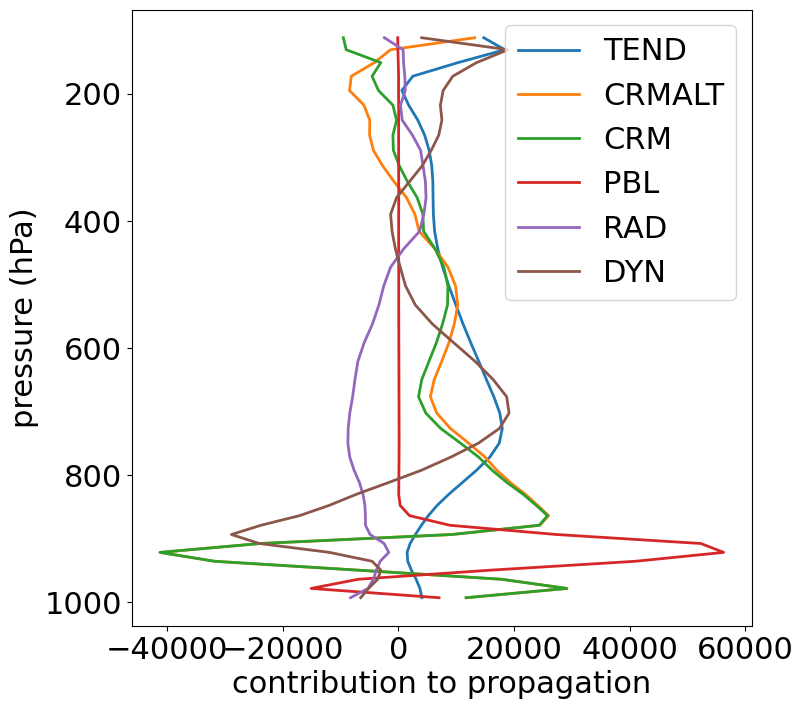

In [143]:
fig, ax = plt.subplots(figsize=(8, 8))

for key in local_propagation.keys():
    if key != 'MSE':
        ax.plot(local_propagation[key], ds.sel(lev=slice(100, None)).lev, label=key, linewidth=2)
ax.legend()
plt.gca().invert_yaxis()
plt.xlabel('contribution to propagation')
plt.ylabel('pressure (hPa)')

In [146]:
variance_budget = {}
p = ds['lev'].sel(lev=slice(100, None))
dp = np.empty(len(p))
dp[0] = p[1].values - p[0].values
dp[1:] = p[1:].values - p[:-1].values
norm = sum(local_propagation['TEND'][1:] * dp[1:] / 9.8 * 100) 

for key in local_propagation.keys():
    if key != 'MSE':
        variance_budget[key] = sum(local_propagation[key] * dp / 9.8 * 100) / norm

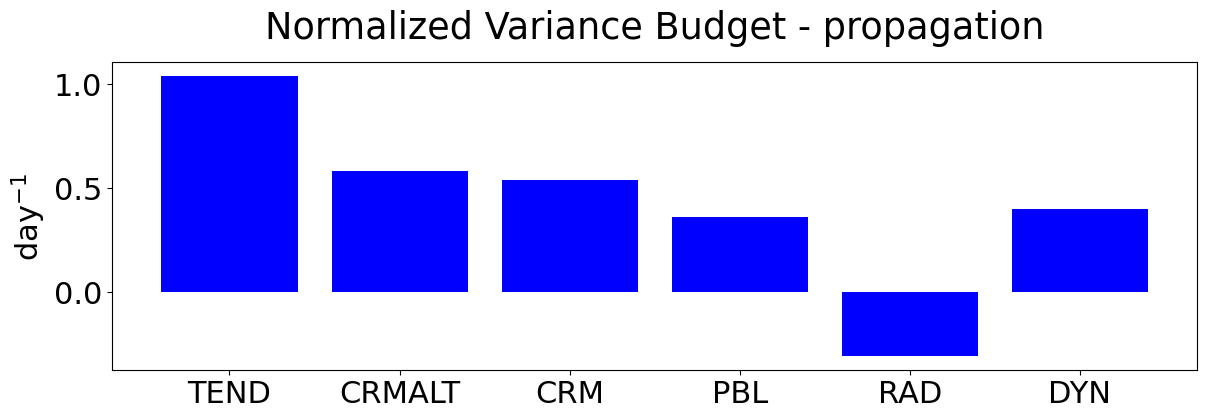

In [148]:
plt.figure(figsize=(14, 4))
plt.rc('font', size=22)  # Set default font size

# Extract keys and values from the dictionary
keys = list(variance_budget.keys())
values = list(variance_budget.values())

# Create the bar plot
plt.bar(keys, values, color='blue')

plt.ylabel('day$^{-1}$')
plt.title('Normalized Variance Budget - propagation', y=1.05)

# # Show numerical values on top of each bar
# for i, value in enumerate(values):
#     plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

## Integrated MSE budget

In [131]:
int_MSE_budget = mjo.get_reg_integrated_MSE_budegt(ds, olr_flt, lat_lim=5, latmean=False)

In [133]:
int_mse = int_MSE_budget['MSE']
int_mse.shape

(6, 180)

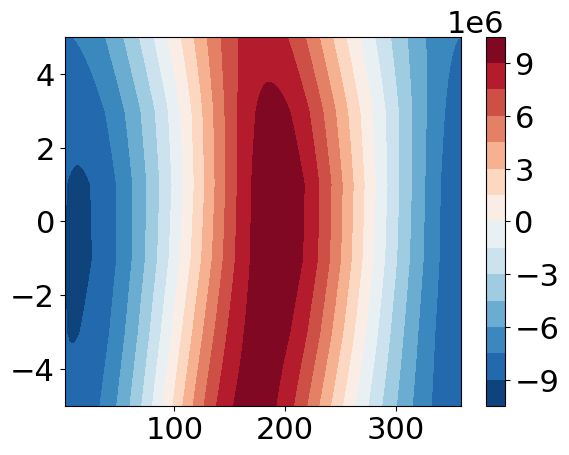

In [135]:
plt.contourf(ds.lon, ds.sel(lat=slice(-5,5)).lat, int_mse, cmap='RdBu_r', levels=15)
plt.colorbar()

In [97]:
int_variance_budget = {}
norm = 0.5 * (int_MSE_budget['MSE'] * int_MSE_budget['MSE']).mean()
for key, values in int_MSE_budget.items():
    if key != 'MSE':
        int_variance_budget[key] = (int_MSE_budget[key] * int_MSE_budget['MSE']).mean() / norm

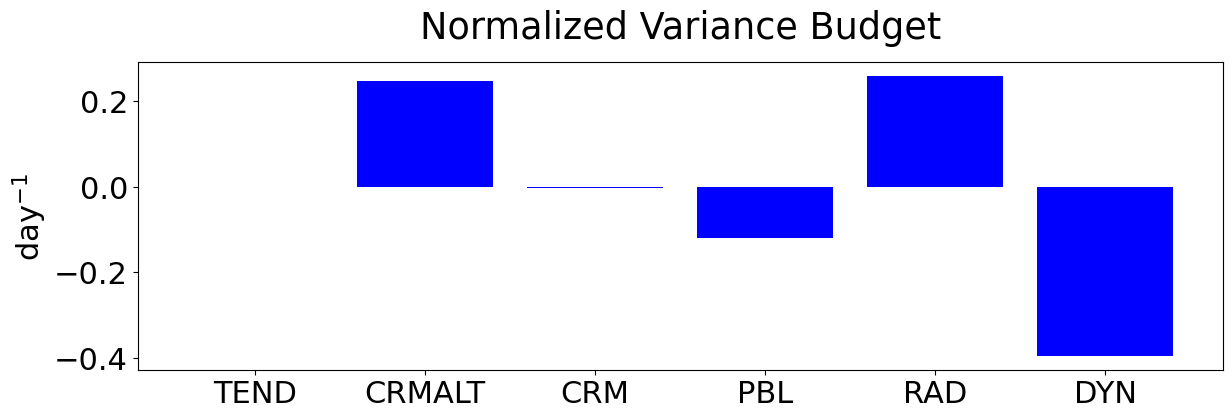

In [98]:
plt.figure(figsize=(14, 4))
plt.rc('font', size=22)  # Set default font size

# Extract keys and values from the dictionary
keys = list(int_variance_budget.keys())
values = list(int_variance_budget.values())

# Create the bar plot
plt.bar(keys, values, color='blue')

plt.ylabel('day$^{-1}$')
plt.title('Normalized Variance Budget', y=1.05)

# # Show numerical values on top of each bar
# for i, value in enumerate(values):
#     plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

Get budget equation for MJO propagation.